In [3]:
def copy_file_content(input_file_path, output_file_path):
    try:
        # Open the input file in binary read mode
        with open(input_file_path, 'rb') as input_file:
            # Read the content of the input file
            content = input_file.read()
        
        # Open the output file in binary write mode
        with open(output_file_path, 'wb') as output_file:
            # Write the content to the output file
            output_file.write(content)
        
        print(f"Content copied successfully from '{input_file_path}' to '{output_file_path}'")
    
    except FileNotFoundError:
        print(f"Error: The file '{input_file_path}' does not exist.")
    except IOError as e:
        print(f"Error: An I/O error occurred. Details: {e}")

# Example usage
input_file = 'C:\\source file\\Resume 1.pdf'  # Replace with your input file path
output_file = 'C:\\Users\\user\\Desktop\\test.txt' # Replace with your desired output file path

copy_file_content(input_file, output_file)


Content copied successfully from 'C:\source file\Resume 1.pdf' to 'C:\Users\user\Desktop\test.txt'


In [1]:
import os
import PyPDF2
import pdfplumber
from docx import Document
from PIL import Image
import pytesseract

# Path to the Tesseract executable (update if needed)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def read_text_file(file_path):
    """Read plain text files."""
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        return file.read()

def read_pdf_file(file_path):
    """Read PDF files using pdfplumber."""
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() or ""
    return text

def read_docx_file(file_path):
    """Read DOCX files."""
    doc = Document(file_path)
    return "\n".join(paragraph.text for paragraph in doc.paragraphs)

def read_image_file(file_path):
    """Read images using OCR."""
    img = Image.open(file_path)
    return pytesseract.image_to_string(img)

def read_file(file_path):
    """Read file based on its type."""
    ext = os.path.splitext(file_path)[1].lower()
    if ext == '.txt':
        return read_text_file(file_path)
    elif ext == '.pdf':
        return read_pdf_file(file_path)
    elif ext == '.docx':
        return read_docx_file(file_path)
    elif ext in ['.jpg', '.jpeg', '.png', '.jfif']:
        return read_image_file(file_path)
    else:
        print(f"Unsupported file type: {ext}")
        return None

def search_word(content, word):
    """Search for the word in the content and return a boolean indicating presence."""
    return word.lower() in content.lower()

def main():
    # Input: File path
    file_path = input("Enter the path to the file: ")

    # Check if the file exists
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        return

    # Read the file content
    content = read_file(file_path)
    if content is None:
        return

    # Print extracted content for debugging
    # print("\nExtracted content from file:\n")
    # print(content)

    # Input: Word to search for
    search_word_input = input("Enter the word to search for: ")

    # Search for the word
    if search_word(content, search_word_input):
        print("The word is present in the file.")
    else:
        print("The word is not present in the file.")

if __name__ == "__main__":
    main()

File not found: a


In [12]:
import os
import PyPDF2
import pdfplumber
from docx import Document
from PIL import Image
import pytesseract

# Path to the Tesseract executable (update if needed)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def read_text_file(file_path):
    """Read plain text files."""
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        return file.read()

def read_pdf_file(file_path):
    """Read PDF files using pdfplumber."""
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() or ""
    return text

def read_docx_file(file_path):
    """Read DOCX files."""
    doc = Document(file_path)
    return "\n".join(paragraph.text for paragraph in doc.paragraphs)

def read_image_file(file_path):
    """Read images using OCR."""
    img = Image.open(file_path)
    return pytesseract.image_to_string(img)

def read_file(file_path):
    """Read file based on its type."""
    ext = os.path.splitext(file_path)[1].lower()
    if ext == '.txt':
        return read_text_file(file_path)
    elif ext == '.pdf':
        return read_pdf_file(file_path)
    elif ext == '.docx':
        return read_docx_file(file_path)
    elif ext in ['.jpg', '.jpeg', '.png', '.jfif']:
        return read_image_file(file_path)
    else:
        print(f"Unsupported file type: {ext}")
        return None

def find_text_position(content, search_term):
    """Find the position of the term in the content and return it."""
    index = content.lower().find(search_term.lower())
    return index if index != -1 else None

def main():
    # Input: File path
    file_path = input("Enter the path to the file: ")

    # Check if the file exists
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        return

    # Read the file content
    content = read_file(file_path)
    if content is None:
        return

    # Input: Text to search for
    search_term = input("Enter the text to search for: ")

    # Find the position of the text
    position = find_text_position(content, search_term)

    # Provide feedback
    if position is not None:
        print(f"The text is present in the file at position: {position}")
    else:
        print("The text is not present in the file.")

if __name__ == "__main__":
    main()

The text is present in the file at position: 11


In [18]:
import os
import pandas as pd
from pandas.errors import EmptyDataError
import PyPDF2
import docx

def extract_content_from_file(file_path):
    """Extract content from different file types."""
    try:
        file_extension = os.path.splitext(file_path)[1].lower()
        print(f"Processing file: {file_path} (Extension: {file_extension})")

        if file_extension == '.txt':
            with open(file_path, 'r', encoding='utf-8') as file:
                return file.read()

        elif file_extension == '.pdf':
            with open(file_path, 'rb') as file:
                reader = PyPDF2.PdfReader(file)
                text = ''
                for page_num in range(len(reader.pages)):
                    page_text = reader.pages[page_num].extract_text()
                    if page_text:
                        text += page_text
                return text

        elif file_extension == '.docx':
            doc = docx.Document(file_path)
            text = "\n".join([para.text for para in doc.paragraphs if para.text.strip()])  # Exclude empty paragraphs
            return text

        elif file_extension in ['.xlsx', '.xls']:
            try:
                engine = 'openpyxl' if file_extension == '.xlsx' else 'xlrd'
                df = pd.read_excel(file_path, engine=engine)
                return df.to_string(index=False)
            except EmptyDataError:
                return "Empty Excel file."
            except Exception as e:
                return f"Error reading Excel file: {e}"

        else:
            return f"Unsupported file type: {file_extension}"

    except Exception as e:
        return f"Error reading {file_path}: {e}"

def copy_files_content(source_file_paths, destination_file_path):
    """Copy the content of the source files to the destination file."""
    try:
        with open(destination_file_path, 'w', encoding='utf-8') as dest_file:
            for source_file_path in source_file_paths:
                content = extract_content_from_file(source_file_path)
                dest_file.write(f"\n\n--- Content from: {source_file_path} ---\n\n")
                dest_file.write(content)
                dest_file.write("\n" + "-" * 50 + "\n")
        print(f"Content copied from {len(source_file_paths)} file(s) to '{destination_file_path}'.")
    except Exception as e:
        print(f"Error copying file content: {e}")

def search_date_in_excel(excel_file_path, purchase_date):
    """Search for file names corresponding to a given date in the Excel sheet."""
    try:
        if excel_file_path.endswith('.xlsx'):
            df = pd.read_excel(excel_file_path, engine='openpyxl')
        elif excel_file_path.endswith('.xls'):
            df = pd.read_excel(excel_file_path, engine='xlrd')
        else:
            print("Unsupported file format.")
            return None

        # Print column names to debug
        print("Column names in Excel file:", df.columns.tolist())

        # Strip any extra spaces from column names
        df.columns = df.columns.str.strip()

        if 'date of purchase' in df.columns and 'File Name' in df.columns:
            # Ensure 'date of purchase' column is properly parsed
            df['date of purchase'] = pd.to_datetime(df['date of purchase'], format='%d/%m/%Y', errors='coerce')
            df['date of purchase'] = df['date of purchase'].dt.strftime('%d/%m/%Y')
            filtered_df = df[df['date of purchase'] == purchase_date]
            
            if not filtered_df.empty:
                print(f"Date '{purchase_date}' found in the Excel sheet.")
                return filtered_df['File Name'].tolist()
            else:
                print(f"Date '{purchase_date}' not found in the Excel sheet.")
                return None
        else:
            print("Required columns are missing in the Excel sheet.")
            return None
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return None

def find_files_in_folder(folder_path, file_names):
    """Search for files in the source folder that match the given file names."""
    found_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file in file_names:
                found_files.append(os.path.join(root, file))
    return found_files

if __name__ == "__main__":
    input_date = input("Enter the date of purchase (format: d/m/yyyy): ")
    
    # Print the input date for debugging
    print(f"User input date: {input_date}")

    excel_file_path = r"C:\source file\trip sheet.xlsx"
    source_folder = r"C:\source file"
    destination_folder = r"C:\destination file"

    file_names = search_date_in_excel(excel_file_path, input_date)

    if file_names:
        matching_files = find_files_in_folder(source_folder, file_names)
        
        if matching_files:
            print(f"{len(matching_files)} file(s) found for date {input_date}.")
            
            if not os.path.exists(destination_folder):
                os.makedirs(destination_folder)
            
            destination_file_path = os.path.join(destination_folder, f"{input_date}.txt")
            
            copy_files_content(matching_files, destination_file_path)
        else:
            print(f"No files found in the source folder for the date {input_date}.")
            empty_file_path = os.path.join(destination_folder, f"{input_date}.txt")
            with open(empty_file_path, 'w') as f:
                f.write(f"No files found for the date: {input_date}")
            print(f"Empty file created at: {empty_file_path}")
    else:
        print(f"Date '{input_date}' not found in the Excel sheet.")


User input date: 9-6-2024
Column names in Excel file: ['vendor code', 'File Name', 'date of purchase']
Date '9-6-2024' not found in the Excel sheet.
Date '9-6-2024' not found in the Excel sheet.


In [25]:
import os
import pandas as pd
from pandas.errors import EmptyDataError
import PyPDF2
import docx

def extract_content_from_file(file_path):
    """Extract content from different file types."""
    try:
        file_extension = os.path.splitext(file_path)[1].lower()
        print(f"Processing file: {file_path}")

        if file_extension == '.txt':
            with open(file_path, 'r', encoding='utf-8') as file:
                return file.read()

        elif file_extension == '.pdf':
            with open(file_path, 'rb') as file:
                reader = PyPDF2.PdfReader(file)
                text = ''
                for page_num in range(len(reader.pages)):
                    page_text = reader.pages[page_num].extract_text()
                    if page_text:
                        text += page_text
                return text

        elif file_extension == '.docx':
            doc = docx.Document(file_path)
            text = "\n".join([para.text for para in doc.paragraphs if para.text.strip()])  # Exclude empty paragraphs
            return text

        elif file_extension in ['.xlsx', '.xls']:
            try:
                engine = 'openpyxl' if file_extension == '.xlsx' else 'xlrd'
                df = pd.read_excel(file_path, engine=engine)
                return df.to_string(index=False)
            except EmptyDataError:
                return "Empty Excel file."
            except Exception as e:
                return f"Error reading Excel file: {e}"

        else:
            return f"Unsupported file type: {file_extension}"

    except Exception as e:
        return f"Error reading {file_path}: {e}"

def copy_files_content(source_file_paths, destination_file_path):
    """Copy the content of the source files to the destination file."""
    try:
        with open(destination_file_path, 'w', encoding='utf-8') as dest_file:
            for source_file_path in source_file_paths:
                content = extract_content_from_file(source_file_path)
                dest_file.write(f"\n\n--- Content from: {source_file_path} ---\n\n")
                dest_file.write(content)
                dest_file.write("\n" + "-" * 50 + "\n")
        print(f"Content copied from {len(source_file_paths)} file(s) to '{destination_file_path}'.")
    except Exception as e:
        print(f"Error copying file content: {e}")

def search_date_in_excel(excel_file_path, purchase_date):
    """Search for file names corresponding to a given date in the Excel sheet."""
    try:
        if excel_file_path.endswith('.xlsx'):
            df = pd.read_excel(excel_file_path, engine='openpyxl')
        elif excel_file_path.endswith('.xls'):
            df = pd.read_excel(excel_file_path, engine='xlrd')
        else:
            print("Unsupported file format.")
            return None

        # Print column names to debug
        print("Column names in Excel file:", df.columns.tolist())

        # Strip any extra spaces from column names
        df.columns = df.columns.str.strip()

        if 'date of purchase' in df.columns and 'File Name' in df.columns:
            # Ensure 'date of purchase' column is properly parsed
            df['date of purchase'] = pd.to_datetime(df['date of purchase'], format='%d-%m-%Y', errors='coerce').dt.strftime('%d-%m-%Y')
            filtered_df = df[df['date of purchase'] == purchase_date]
            
            if not filtered_df.empty:
                print(f"Date '{purchase_date}' found in the Excel sheet.")
                return filtered_df['File Name'].tolist()
            else:
                print(f"Date '{purchase_date}' not found in the Excel sheet.")
                return None
        else:
            print("Required columns are missing in the Excel sheet.")
            return None
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return None

def find_files_in_folder(folder_path, file_names):
    """Search for files in the source folder that match the given file names."""
    found_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file in file_names:
                found_files.append(os.path.join(root, file))
    return found_files

if __name__ == "__main__":
    input_date = input("Enter the date of purchase (format: dd-mm-yyyy): ")

    excel_file_path = r"C:\source file\trip sheet.xlsx"
    source_folder = r"C:\source file"
    destination_folder = r"C:\destination file"

    file_names = search_date_in_excel(excel_file_path, input_date)

    if file_names:
        matching_files = find_files_in_folder(source_folder, file_names)
        
        if matching_files:
            print(f"{len(matching_files)} file(s) found for date {input_date}.")
            
            if not os.path.exists(destination_folder):
                os.makedirs(destination_folder)
            
            destination_file_path = os.path.join(destination_folder, f"{input_date}.txt")
            
            copy_files_content(matching_files, destination_file_path)
        else:
            print(f"No files found in the source folder for the date {input_date}.")
            empty_file_path = os.path.join(destination_folder, f"{input_date}.txt")
            with open(empty_file_path, 'w') as f:
                f.write(f"No files found for the date: {input_date}")
            print(f"Empty file created at: {empty_file_path}")
    else:
        print(f"Date '{input_date}' not found in the Excel sheet.")

Column names in Excel file: ['vendor code', 'File Name', 'date of purchase']
Date '09-06-2024' found in the Excel sheet.
1 file(s) found for date 09-06-2024.
Processing file: C:\source file\z.pdf
Content copied from 1 file(s) to 'C:\destination file\09-06-2024.txt'.


In [1]:
!pip install Flask pandas openpyxl


In [1]:
!pip install python-doctr


     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     - ------------------------------------- 30.7/981.5 kB 1.3 MB/s eta 0:00:01
     ------- ------------------------------ 184.3/981.5 kB 2.8 MB/s eta 0:00:01
     ---------------- --------------------- 430.1/981.5 kB 3.9 MB/s eta 0:00:01
     ------------------------- ------------ 655.4/981.5 kB 3.8 MB/s eta 0:00:01
     ------------------------------- ------ 809.0/981.5 kB 3.6 MB/s eta 0:00:01
     -------------------------------------  972.8/981.5 kB 3.9 MB/s eta 0:00:01
     -------------------------------------  972.8/981.5 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/299.5 kB ? eta -:--:--
   ---------------------------------------  297.0/299.5 kB 6.1 MB/s eta 0:00:01
   -------------------------------

In [11]:
import cv2
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

# Load your image or document
doc = DocumentFile.from_images("C:\\Users\\user\\Desktop\\POD\\PR24006866 POD.jpg")

# Instantiate a pre-trained OCR model
model = ocr_predictor(pretrained=True)

# Perform OCR on the image
result = model(doc)

# Print the recognized text
print(result.export())


{'pages': [{'page_idx': 0, 'dimensions': (550, 840), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.0673828125, 0.10625000000000001), (1.0, 0.9892045454545455)), 'objectness_score': 0.656734275072813, 'lines': [{'geometry': ((0.109375, 0.11072443181818181), (0.1826171875, 0.15845170454545454)), 'objectness_score': 0.4942934811115265, 'words': [{'value': 'Shipper', 'confidence': 0.9973737001419067, 'geometry': ((0.109375, 0.11072443181818181), (0.1826171875, 0.15845170454545454)), 'objectness_score': 0.4942934811115265, 'crop_orientation': {'value': 0, 'confidence': None}}]}, {'geometry': ((0.3359375, 0.10625000000000001), (0.458984375, 0.15546875)), 'objectness_score': 0.5513105988502502, 'words': [{'value': 'Booking', 'confidence': 0.5621047616004944, 'geometry': ((0.3359375, 0.12116477272727272), (0.3828125, 0.15546875)), 'objectness_score': 0.5099415183067322, 'crop_orientation': {'value': 0, 'confiden

In [7]:
import matplotlib.pyplot as plt

result.show(doc)  # Displays the image with OCR text boxes
plt.show()


TypeError: Document.show() takes 1 positional argument but 2 were given

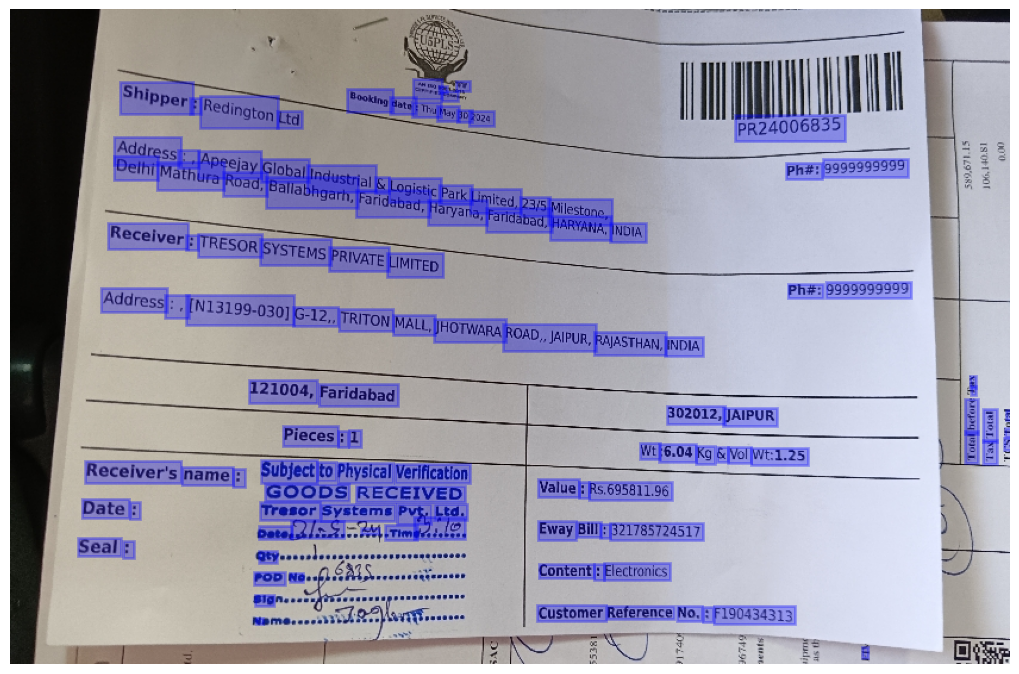

In [12]:
import cv2
import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

# Load your image or document
doc = DocumentFile.from_images("C:\\Users\\user\\Desktop\\POD\\PR24006866 POD.jpg")

# Instantiate a pre-trained OCR model
model = ocr_predictor(pretrained=True)

# Perform OCR on the image
result = model(doc)

# Get the page layout and visualize the textboxes
for page in result.pages:
    page.show()  # This will display the text boxes over the image
    plt.show()   # Use plt.show() to display the image in the output


In [9]:
!pip install mplcursors

     ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
     ------------- ------------------------ 30.7/88.8 kB 262.6 kB/s eta 0:00:01
     -------------------------- ----------- 61.4/88.8 kB 469.7 kB/s eta 0:00:01
     ----------------------------------- -- 81.9/88.8 kB 573.4 kB/s eta 0:00:01
     ----------------------------------- -- 81.9/88.8 kB 573.4 kB/s eta 0:00:01
     ----------------------------------- -- 81.9/88.8 kB 573.4 kB/s eta 0:00:01
     ----------------------------------- -- 81.9/88.8 kB 573.4 kB/s eta 0:00:01
     ----------------------------------- -- 81.9/88.8 kB 573.4 kB/s eta 0:00:01
     ----------------------------------- -- 81.9/88.8 kB 573.4 kB/s eta 0:00:01
     -------------------------------------- 88.8/88.8 kB 201.0 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build w

In [13]:
from PIL import Image
from doctr.models import detection, recognition
from doctr.io import DocumentFile
import numpy as np

def detect_text_regions(image_path):
    """
    Detect text regions in the image using doctr.

    :param image_path: Path to the image file
    :return: List of detected text regions (tuples of (left, top, right, bottom))
    """
    # Load the OCR model for detection
    model = detection.detection_v3()

    # Load image and convert to DocumentFile
    img = Image.open(image_path)
    img_np = np.array(img)
    doc_file = DocumentFile.from_image(img_np)

    # Perform text region detection
    result = model(doc_file)
    
    # Extract bounding boxes of detected text regions
    regions = []
    for page in result.pages:
        for block in page.blocks:
            for line in block.lines:
                bbox = line.bbox
                regions.append((bbox[0], bbox[1], bbox[2], bbox[3]))  # Convert bbox to (left, top, right, bottom)
                
    return regions

def crop_and_save_regions(image_path, regions, output_folder):
    """
    Crop and save detected text regions from the image.

    :param image_path: Path to the image file
    :param regions: List of detected text regions (tuples of (left, top, right, bottom))
    :param output_folder: Folder to save cropped images
    """
    img = Image.open(image_path)
    
    for i, region in enumerate(regions):
        left, top, right, bottom = region
        cropped_img = img.crop((left, top, right, bottom))
        cropped_img.save(f"{output_folder}/cropped_region_{i}.png")

if __name__ == "__main__":
    # Specify the path to your image
    image_path = "path_to_your_image.jpg"
    
    # Detect text regions
    regions = detect_text_regions(image_path)
    
    # Print detected regions for debugging
    print("Detected regions:", regions)
    
    # Specify the output folder for cropped images
    output_folder = "path_to_output_folder"
    
    # Crop and save detected regions
    crop_and_save_regions(image_path, regions, output_folder)


AttributeError: module 'doctr.models.detection' has no attribute 'detection_v3'

In [14]:
import doctr.models

# List all available models and functions in doctr.models
print(dir(doctr.models))


['CRNN', 'DBNet', 'FAST', 'LinkNet', 'MASTER', 'PARSeq', 'ResNet', 'SAR', 'ViTSTR', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_utils', 'base', 'builder', 'classification', 'core', 'crnn', 'crnn_mobilenet_v3_large', 'crnn_mobilenet_v3_small', 'crnn_vgg16_bn', 'crop_orientation_predictor', 'db_mobilenet_v3_large', 'db_resnet34', 'db_resnet50', 'detection', 'detection_predictor', 'differentiable_binarization', 'factory', 'fast', 'fast_base', 'fast_small', 'fast_tiny', 'from_hub', 'hub', 'is_tf_available', 'is_torch_available', 'kie_predictor', 'linknet', 'linknet_resnet18', 'linknet_resnet34', 'linknet_resnet50', 'login_to_hub', 'magc_resnet', 'magc_resnet31', 'master', 'mobilenet', 'mobilenet_v3_large', 'mobilenet_v3_large_r', 'mobilenet_v3_small', 'mobilenet_v3_small_crop_orientation', 'mobilenet_v3_small_page_orientation', 'mobilenet_v3_small_r', 'modules', 'ocr_predictor', 'page_orientation_predictor', 'parse

Help on package doctr.models.detection in doctr.models:

NAME
    doctr.models.detection

PACKAGE CONTENTS
    _utils (package)
    core
    differentiable_binarization (package)
    fast (package)
    linknet (package)
    predictor (package)
    zoo

SUBMODULES
    base
    pytorch

FILE
    c:\users\user\anaconda3\lib\site-packages\doctr\models\detection\__init__.py




In [ ]:
import doctr.models.detection

help(doctr.models.detection)


In [16]:
from PIL import Image
from doctr.models import detection, recognition
from doctr.io import DocumentFile
import numpy as np

def detect_text_regions(image_path):
    """
    Detect text regions in the image using doctr.

    :param image_path: Path to the image file
    :return: List of detected text regions (tuples of (left, top, right, bottom))
    """
    # Load the OCR model for detection
    model = detection.detect_v1()  # Use the correct model function based on your version

    # Load image and convert to DocumentFile
    img = Image.open(image_path)
    img_np = np.array(img)
    doc_file = DocumentFile.from_image(img_np)

    # Perform text region detection
    result = model(doc_file)
    
    # Extract bounding boxes of detected text regions
    regions = []
    for page in result.pages:
        for block in page.blocks:
            for line in block.lines:
                bbox = line.bbox
                regions.append((bbox[0], bbox[1], bbox[2], bbox[3]))  # Convert bbox to (left, top, right, bottom)
                
    return regions

def crop_and_save_regions(image_path, regions, output_folder):
    """
    Crop and save detected text regions from the image.

    :param image_path: Path to the image file
    :param regions: List of detected text regions (tuples of (left, top, right, bottom))
    :param output_folder: Folder to save cropped images
    """
    img = Image.open(image_path)
    
    for i, region in enumerate(regions):
        left, top, right, bottom = region
        cropped_img = img.crop((left, top, right, bottom))
        cropped_img.save(f"{output_folder}/cropped_region_{i}.png")

if __name__ == "__main__":
    # Specify the path to your image
    image_path = "path_to_your_image.jpg"
    
    # Detect text regions
    regions = detect_text_regions(image_path)
    
    # Print detected regions for debugging
    print("Detected regions:", regions)
    
    # Specify the output folder for cropped images
    output_folder = "path_to_output_folder"
    
    # Crop and save detected regions
    crop_and_save_regions(image_path, regions, output_folder)


AttributeError: module 'doctr.models.detection' has no attribute 'detect_v1'

In [17]:
import doctr.models.detection

# Print available attributes and methods in the detection module
print(dir(doctr.models.detection))


['DBNet', 'FAST', 'LinkNet', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_utils', 'base', 'core', 'db_mobilenet_v3_large', 'db_resnet34', 'db_resnet50', 'detection_predictor', 'differentiable_binarization', 'fast', 'fast_base', 'fast_small', 'fast_tiny', 'is_tf_available', 'is_torch_available', 'linknet', 'linknet_resnet18', 'linknet_resnet34', 'linknet_resnet50', 'predictor', 'pytorch', 'reparameterize', 'zoo']


In [21]:
from PIL import Image
import doctr
import numpy as np

def detect_text_regions(image_path):
    """
    Detect text regions in the image using doctr.

    :param image_path: Path to the image file
    :return: List of detected text regions (tuples of (left, top, right, bottom))
    """
    # Load the OCR model for detection
    # Check your installed version for the correct model
    model = doctr.models.detection.TextDetector()

    # Load image and convert to a format suitable for doctr
    img = Image.open(image_path)
    img_np = np.array(img)

    # Perform text region detection
    result = model([img_np])[0]
    
    # Extract bounding boxes of detected text regions
    regions = []
    for page in result.pages:
        for block in page.blocks:
            for line in block.lines:
                bbox = line.bbox
                regions.append((bbox[0], bbox[1], bbox[2], bbox[3]))  # Convert bbox to (left, top, right, bottom)
                
    return regions

def crop_and_save_regions(image_path, regions, output_folder):
    """
    Crop and save detected text regions from the image.

    :param image_path: Path to the image file
    :param regions: List of detected text regions (tuples of (left, top, right, bottom))
    :param output_folder: Folder to save cropped images
    """
    img = Image.open(image_path)
    
    for i, region in enumerate(regions):
        left, top, right, bottom = region
        cropped_img = img.crop((left, top, right, bottom))
        cropped_img.save(f"{output_folder}/cropped_region_{i}.png")

if __name__ == "__main__":
    # Specify the path to your image
    image_path = "C:\\Users\\user\\Desktop\\POD\\PR24006866 POD.jpg"
    
    # Detect text regions
    regions = detect_text_regions(image_path)
    
    # Print detected regions for debugging
    print("Detected regions:", regions)
    
    # Specify the output folder for cropped images
    output_folder = "C:\destination file"
    
    # Crop and save detected regions
    crop_and_save_regions(image_path, regions, output_folder)


<>:59: SyntaxWarning: invalid escape sequence '\d'
<>:59: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_9916\3368120785.py:59: SyntaxWarning: invalid escape sequence '\d'
  output_folder = "C:\destination file"
C:\Users\user\AppData\Local\Temp\ipykernel_9916\3368120785.py:59: SyntaxWarning: invalid escape sequence '\d'
  output_folder = "C:\destination file"


AttributeError: module 'doctr.models.detection' has no attribute 'TextDetector'

In [2]:
from PIL import Image
import doctr
import numpy as np

def detect_text_regions(image_path):
    """
    Detect text regions in the image using doctr's text detection model.
    """
    # Load the OCR model for detection
    model = doctr.models.detection.TextDetectionModel()  # Adjust as per doctr's latest API

    # Load image and convert to a format suitable for doctr
    img = Image.open(image_path)
    img_np = np.array(img)

    # Perform text region detection
    result = model([img_np])[0]

    # Extract bounding boxes of detected text regions
    regions = []
    for page in result.pages:
        for block in page.blocks:
            for line in block.lines:
                bbox = line.bbox
                # Append bounding box as (left, top, right, bottom)
                regions.append((bbox[0], bbox[1], bbox[2], bbox[3]))
                
    return regions

def crop_and_save_regions(image_path, regions, output_folder):
    """
    Crop and save text regions from the image.
    """
    img = Image.open(image_path)
    for i, (left, top, right, bottom) in enumerate(regions):
        # Crop the image using the bounding box coordinates
        cropped_img = img.crop((left, top, right, bottom))
        # Save the cropped image
        cropped_img.save(f"{output_folder}/region_{i}.png")

if __name__ == "__main__":
    input_image_path = "C:\\Users\\user\\Desktop\\POD\\PR24006866 POD.jpg"  # Replace with your image path
    output_folder = "C:\\destination file"  # Replace with your desired output folder
    
    # Ensure output folder exists
    import os
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Detect text regions
    regions = detect_text_regions(input_image_path)
    
    # Crop and save detected regions
    crop_and_save_regions(input_image_path, regions, output_folder)
    
    print(f"Detected {len(regions)} text regions and saved cropped images to '{output_folder}'")


AttributeError: module 'doctr.models.detection' has no attribute 'TextDetectionModel'

In [1]:
from PIL import Image
import doctr
import numpy as np
import os

def detect_text_regions(image_path):
    """
    Detect text regions in the image using doctr's detection model.
    """
    # Load the image
    img = Image.open(image_path)

    # Convert image to numpy array
    img_np = np.array(img)

    # Initialize the text detection model
    model = doctr.models.detection.TextDetectionModel()

    # Perform text detection
    result = model([img_np])[0]

    # Extract bounding boxes of detected text regions
    regions = []
    for page in result.pages:
        for block in page.blocks:
            for line in block.lines:
                bbox = line.bbox
                # Append bounding box as (left, top, right, bottom)
                regions.append((bbox[0], bbox[1], bbox[2], bbox[3]))
                
    return regions

def crop_and_save_regions(image_path, regions, output_folder):
    """
    Crop and save text regions from the image.
    """
    img = Image.open(image_path)
    for i, (left, top, right, bottom) in enumerate(regions):
        # Crop the image using the bounding box coordinates
        cropped_img = img.crop((left, top, right, bottom))
        # Save the cropped image
        cropped_img.save(os.path.join(output_folder, f"region_{i}.png"))

if __name__ == "__main__":
    input_image_path = "C:\\Users\\user\\Desktop\\POD\\PR24006866 POD.jpg"   # Replace with your image path
    output_folder =  "C:\\destination file"  # Replace with your desired output folder
    
    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Detect text regions
    regions = detect_text_regions(input_image_path)
    
    # Crop and save detected regions
    crop_and_save_regions(input_image_path, regions, output_folder)
    
    print(f"Detected {len(regions)} text regions and saved cropped images to '{output_folder}'")


AttributeError: module 'doctr.models.detection' has no attribute 'TextDetectionModel'

In [3]:
from PIL import Image
import doctr
import numpy as np
import os

def detect_text_regions(image_path):
    """
    Detect text regions in the image using doctr's detection model.
    """
    # Load the image
    img = Image.open(image_path)

    # Convert image to numpy array
    img_np = np.array(img)

    # Initialize the text detection model
    model = doctr.models.detection.TextDetectionModel()

    # Perform text detection
    result = model([img_np])[0]

    # Extract bounding boxes of detected text regions
    regions = []
    for page in result.pages:
        for block in page.blocks:
            for line in block.lines:
                bbox = line.bbox
                # Append bounding box as (left, top, right, bottom)
                regions.append((bbox[0], bbox[1], bbox[2], bbox[3]))
                
    return regions

def crop_and_save_regions(image_path, regions, output_folder):
    """
    Crop and save text regions from the image.
    """
    img = Image.open(image_path)
    for i, (left, top, right, bottom) in enumerate(regions):
        # Crop the image using the bounding box coordinates
        cropped_img = img.crop((left, top, right, bottom))
        # Save the cropped image
        cropped_img.save(os.path.join(output_folder, f"region_{i}.png"))

if __name__ == "__main__":
    input_image_path = "path_to_your_image_file.png"  # Replace with your image path
    output_folder = "cropped_regions"  # Replace with your desired output folder
    
    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Detect text regions
    regions = detect_text_regions(input_image_path)
    
    # Crop and save detected regions
    crop_and_save_regions(input_image_path, regions, output_folder)
    
    print(f"Detected {len(regions)} text regions and saved cropped images to '{output_folder}'")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Downloads\\path_to_your_image_file.png'

In [4]:
print("Hello")

Hello


In [5]:
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

  0%|          | 0/102021912 [00:00<?, ?it/s]

c:\Users\user\anaconda3\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location=

In [6]:
from doctr.io import DocumentFile
# PDF
pdf_doc = DocumentFile.from_pdf("path/to/your/doc.pdf")
# Image
single_img_doc = DocumentFile.from_images("path/to/your/img.jpg")
# Webpage (requires `weasyprint` to be installed)
webpage_doc = DocumentFile.from_url("https://www.yoursite.com")
# Multiple page images
multi_img_doc = DocumentFile.from_images(["path/to/page1.jpg", "path/to/page2.jpg"])
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)
# PDF
doc = DocumentFile.from_pdf("path/to/your/doc.pdf")
# Analyze
result = model(doc)

FileNotFoundError: C:\Users\user\Downloads\path\to\your\doc.pdf

In [10]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)
# PDF
doc = DocumentFile.from_pdf("C:\\Users\\user\\Desktop\\POD\\435511711 worng pod.jpg")
# Analyze
result = model(doc)
# Display the result (requires matplotlib & mplcursors to be installed)
result.show()

c:\Users\user\anaconda3\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location=

PdfiumError: Failed to load document (PDFium: Data format error).

{
    "pages": [
        {
            "page_idx": 0,
            "dimensions": [
                1000,
                1333
            ],
            "orientation": {
                "value": null,
                "confidence": null
            },
            "language": {
                "value": null,
                "confidence": null
            },
            "blocks": [
                {
                    "geometry": [
                        [
                            0.0,
                            0.15373242187500002
                        ],
                        [
                            0.9990234375,
                            0.8293447265625
                        ]
                    ],
                    "objectness_score": 0.37776935651898386,
                    "lines": [
                        {
                            "geometry": [
                                [
                                    0.599609375,
                             

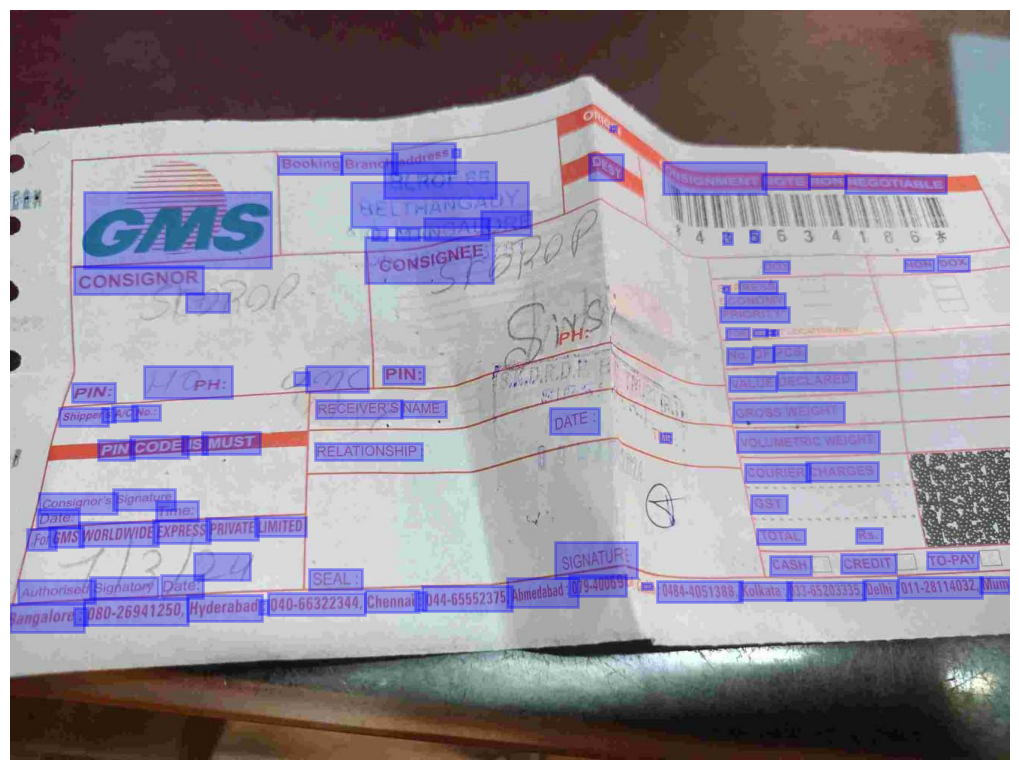

In [15]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import json
model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)
image = DocumentFile.from_images("C:\\Users\\user\\Desktop\\POD\\435511711 worng pod.jpg")
result = model(image)
result_json = result.export()
print(json.dumps(result_json, indent=4))
result.show()

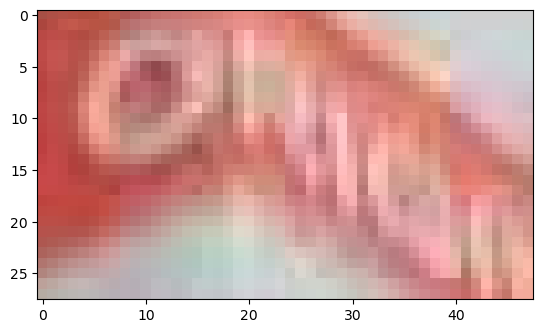

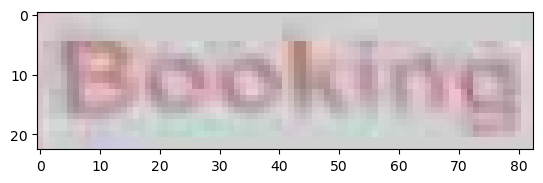

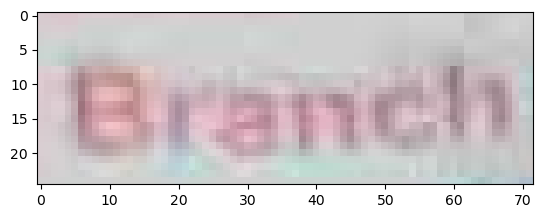

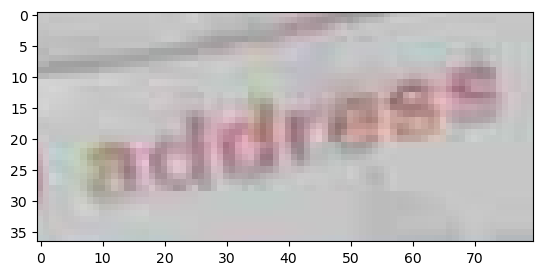

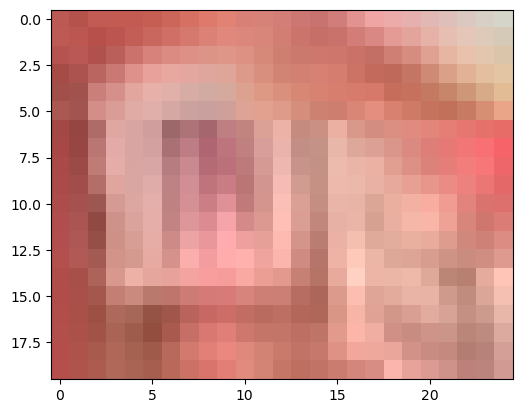

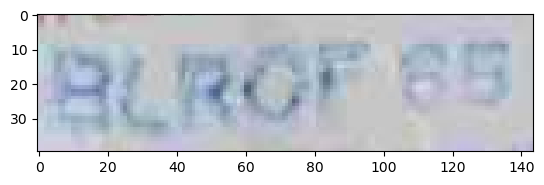

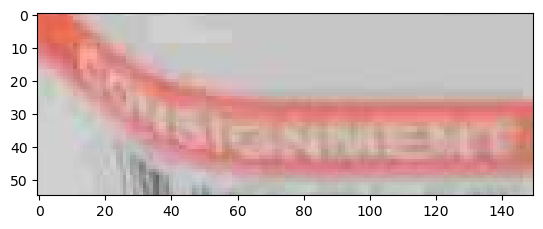

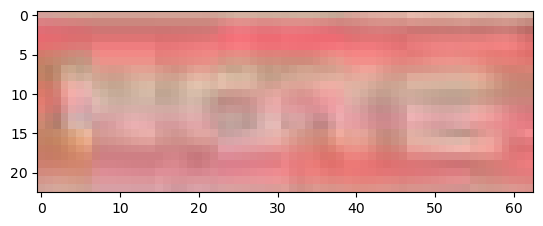

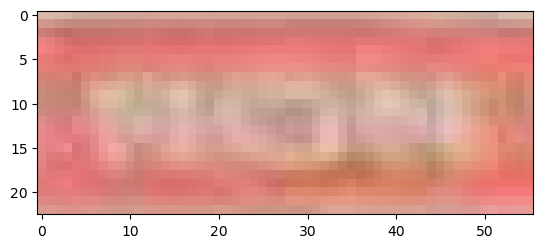

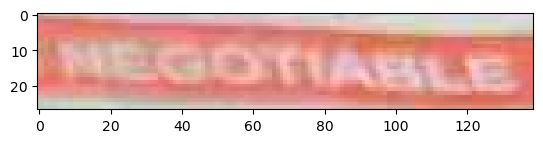

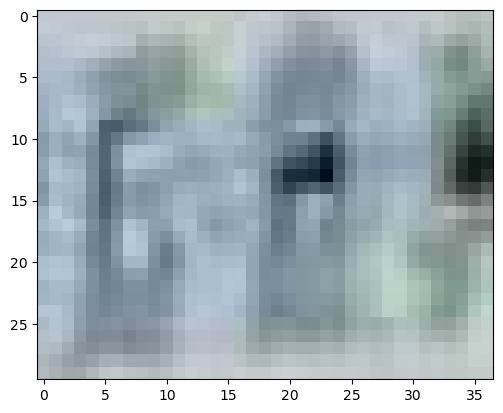

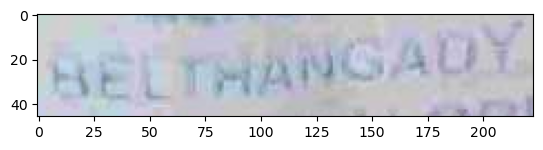

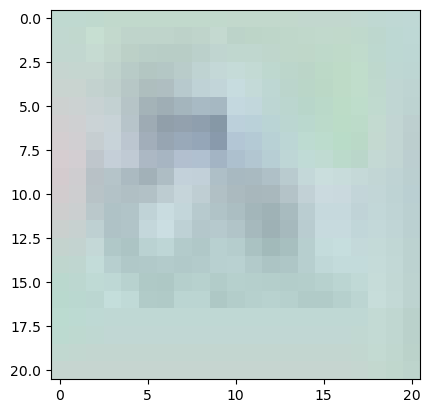

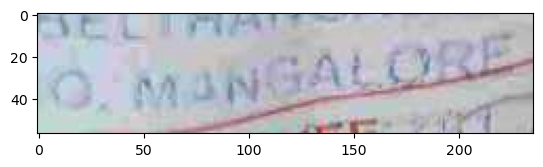

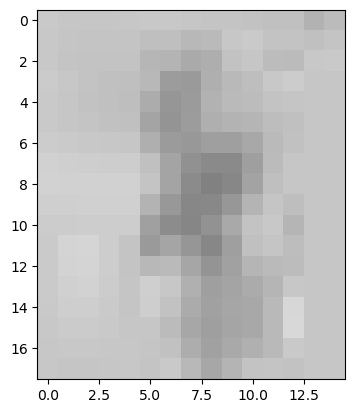

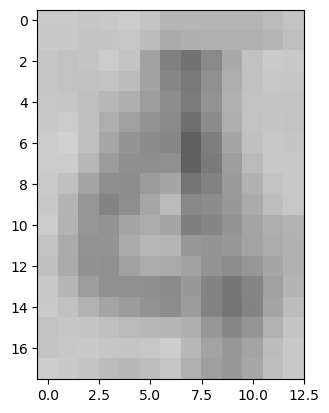

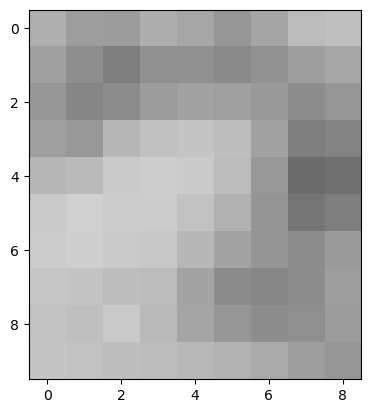

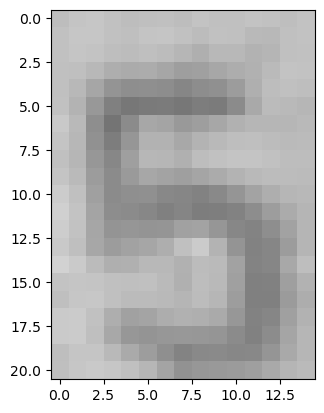

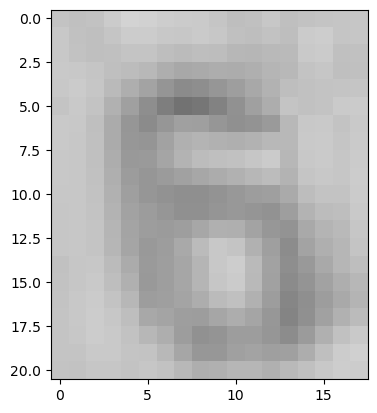

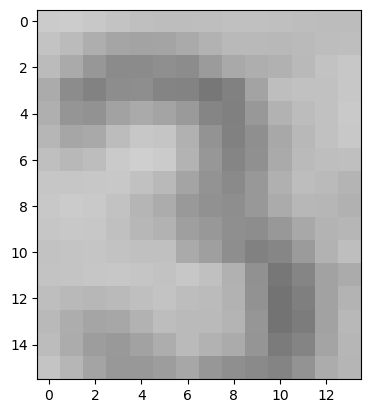

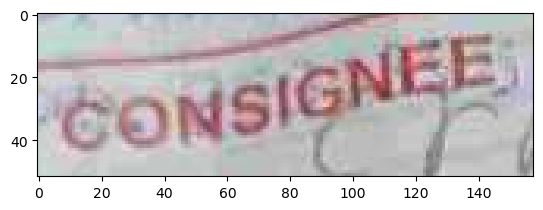

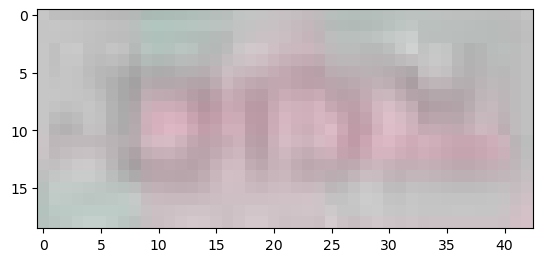

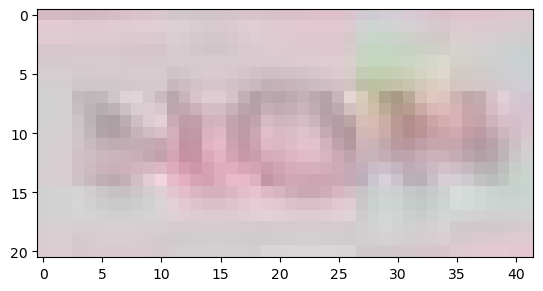

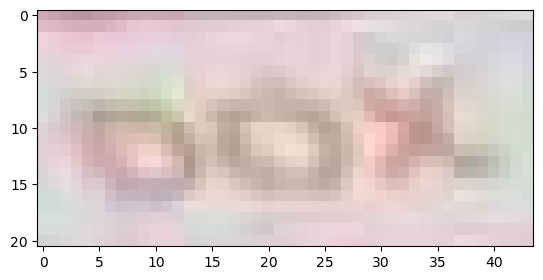

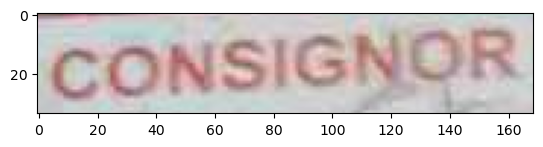

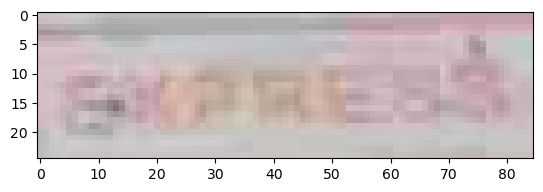

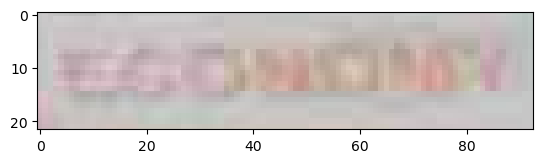

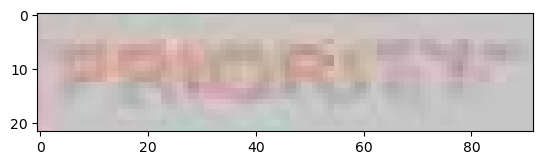

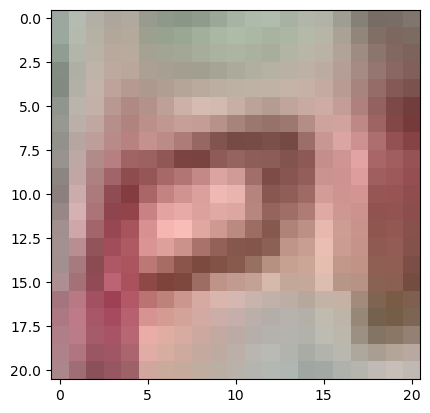

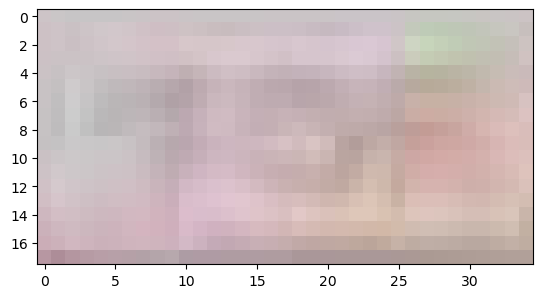

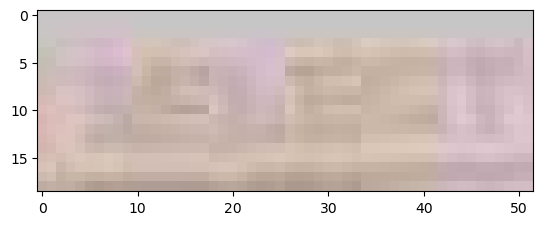

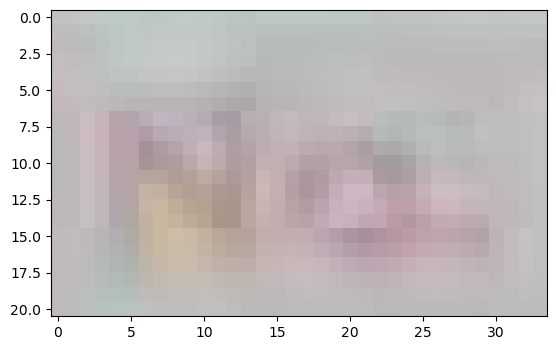

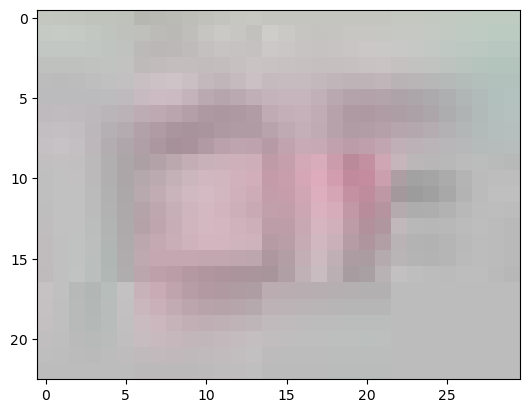

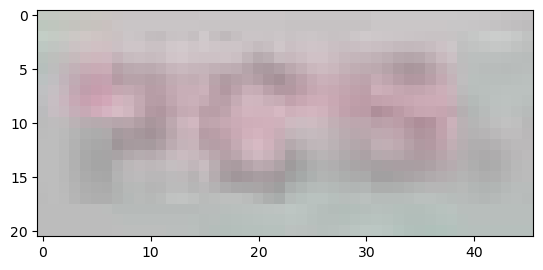

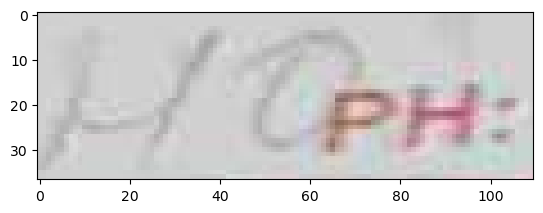

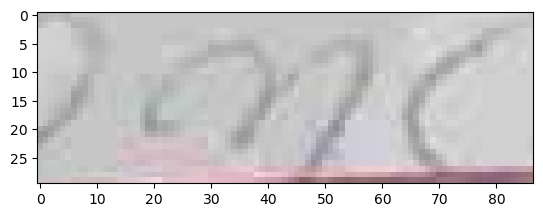

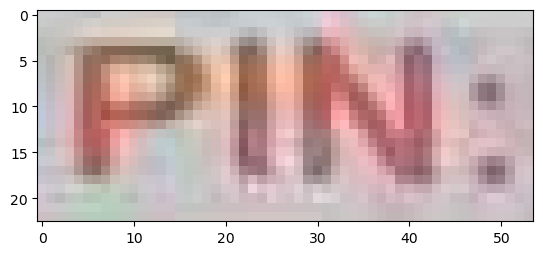

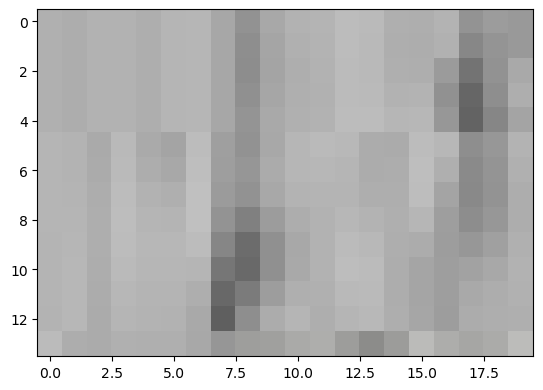

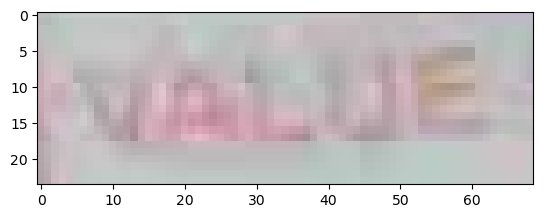

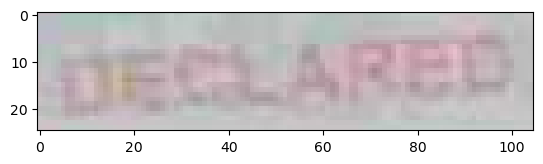

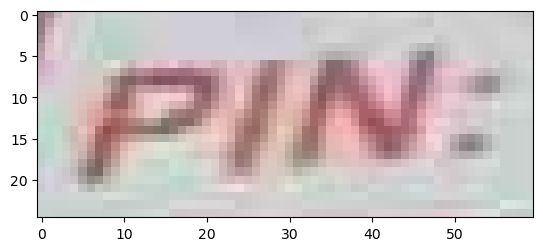

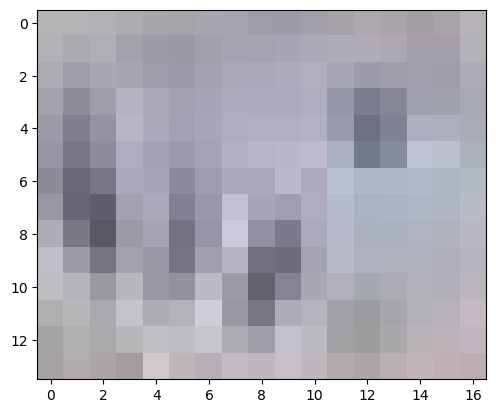

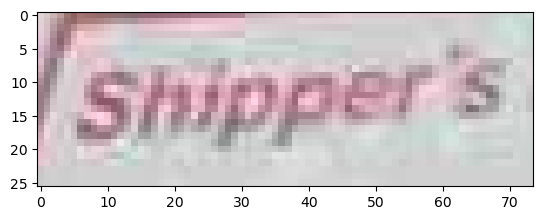

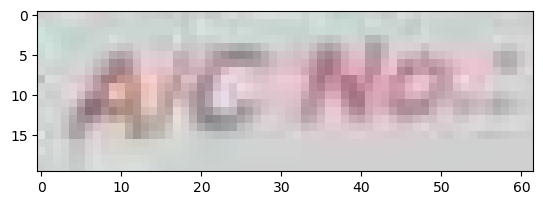

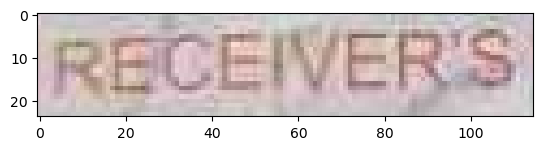

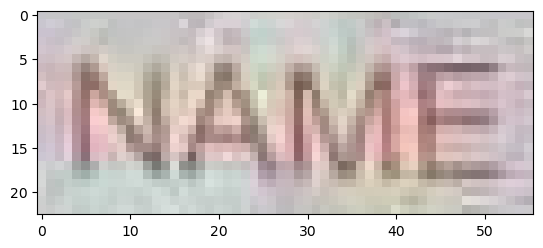

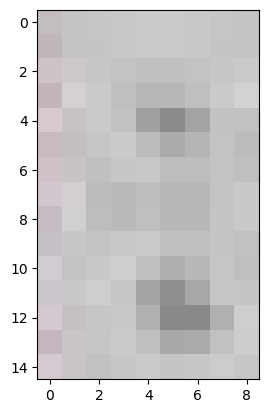

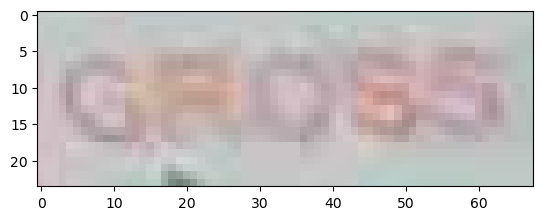

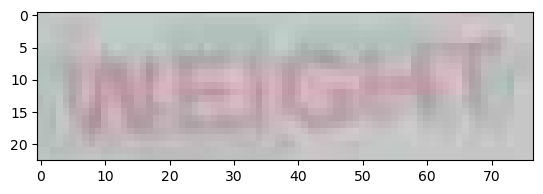

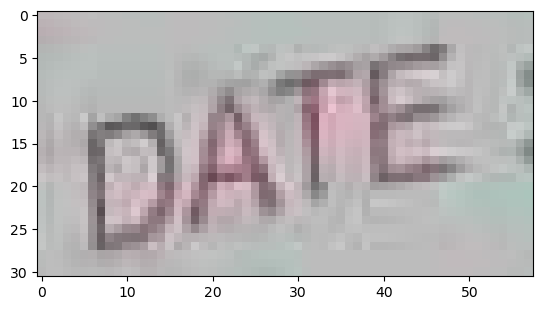

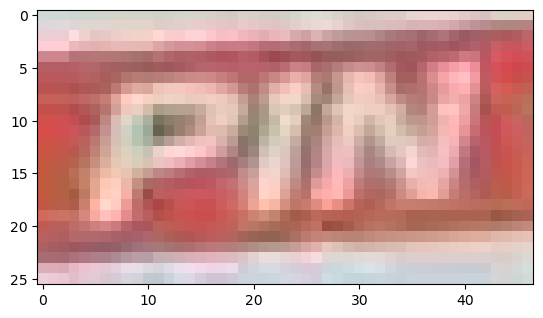

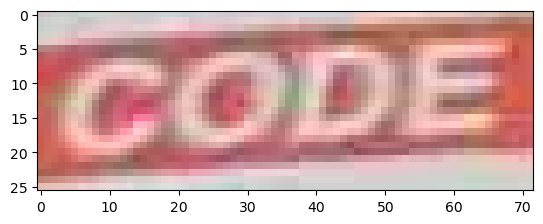

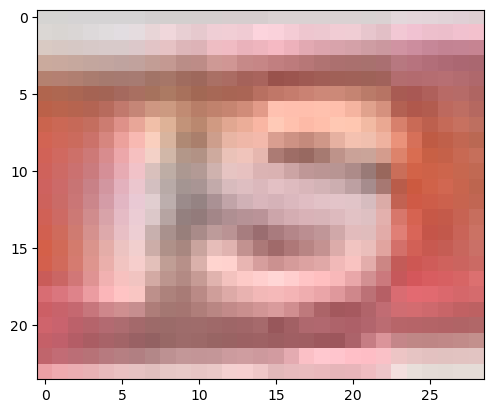

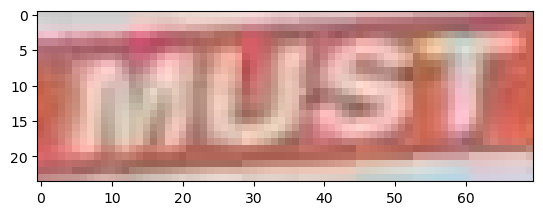

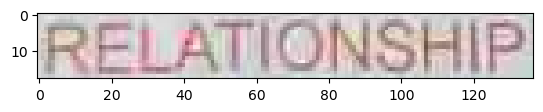

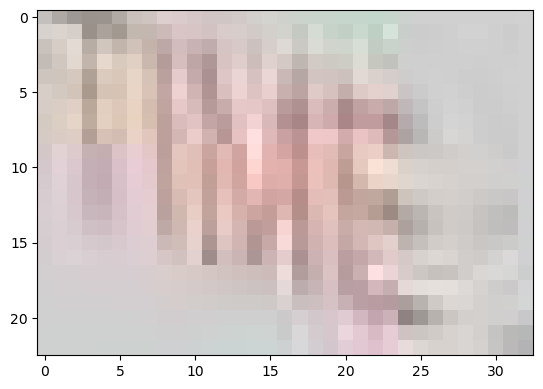

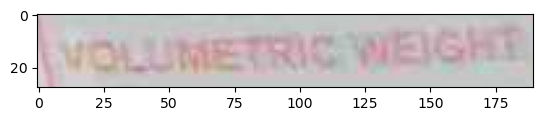

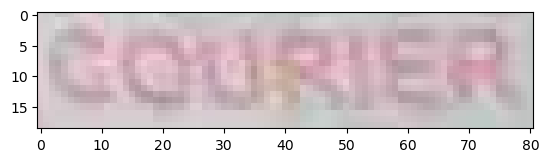

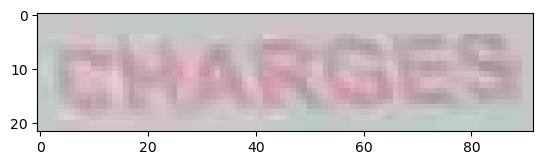

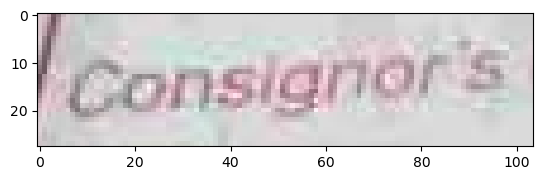

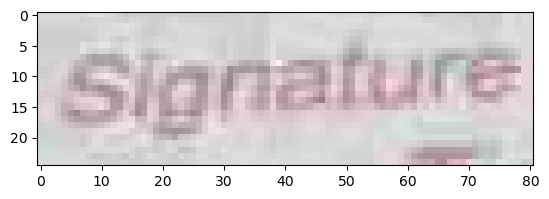

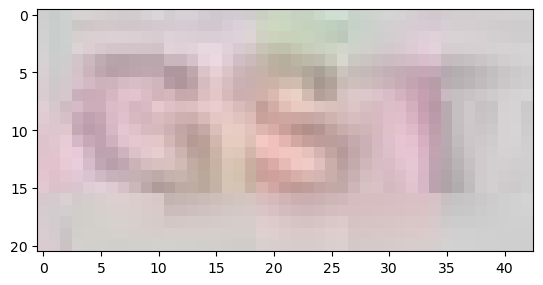

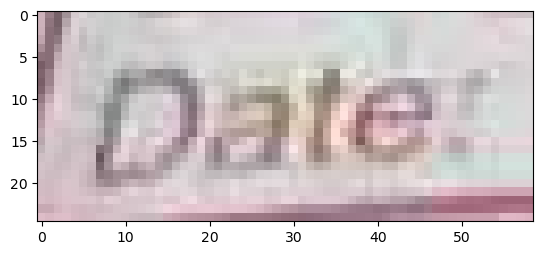

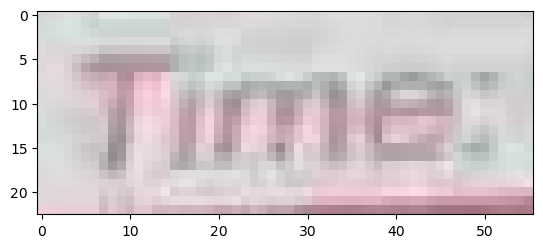

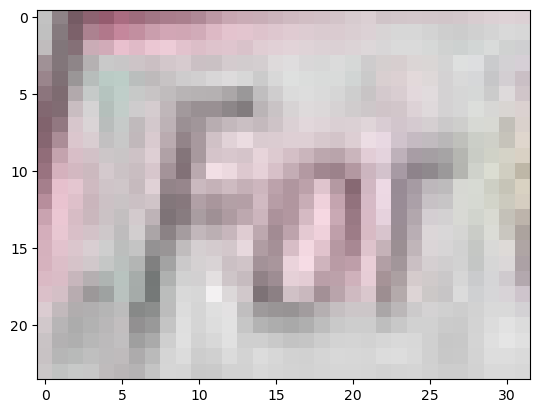

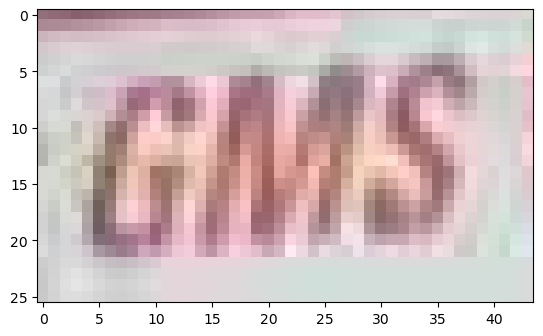

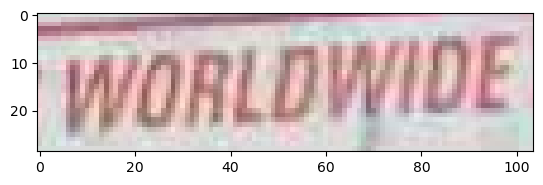

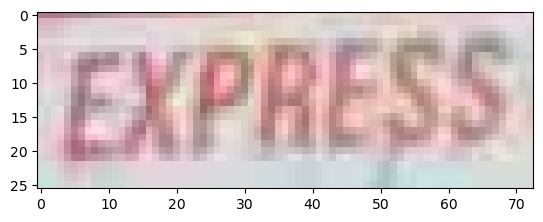

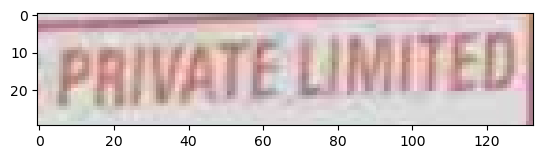

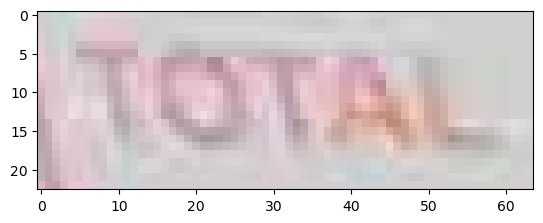

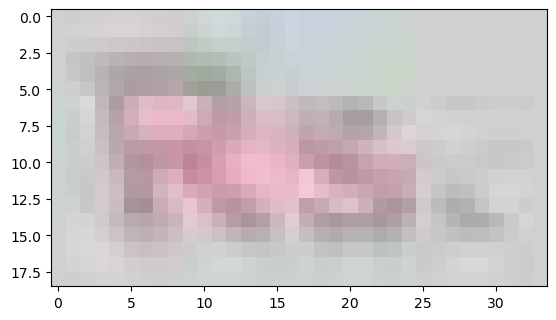

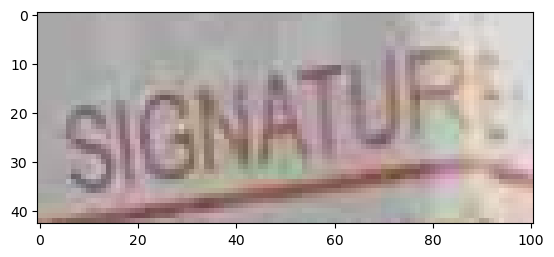

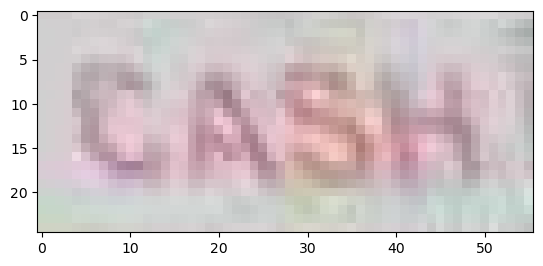

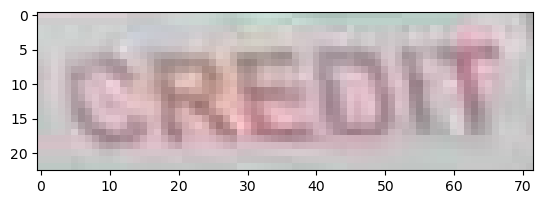

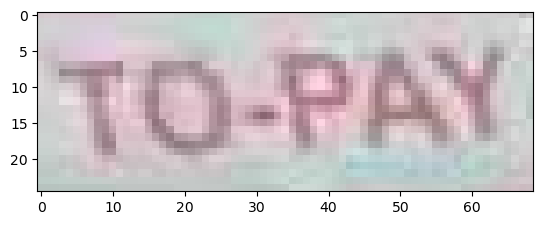

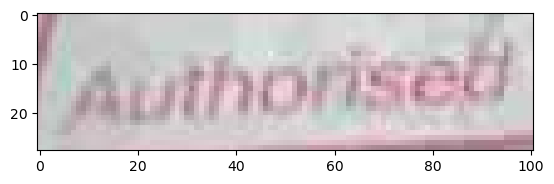

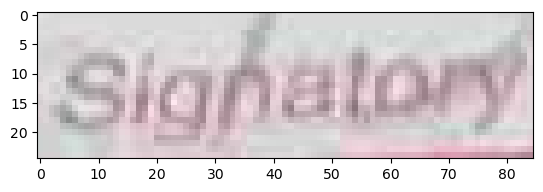

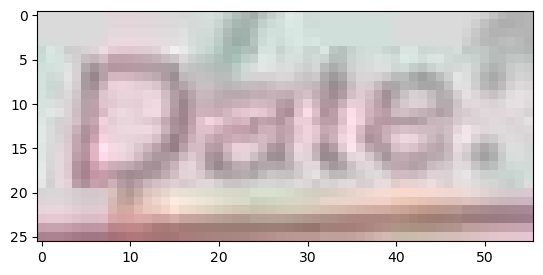

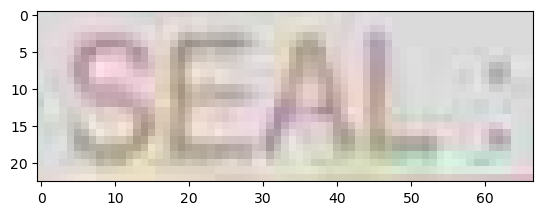

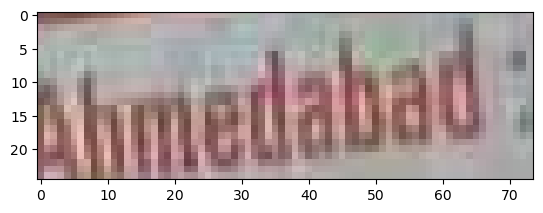

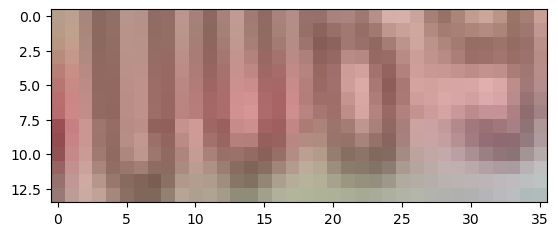

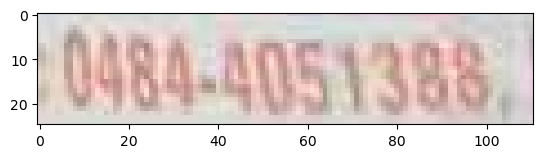

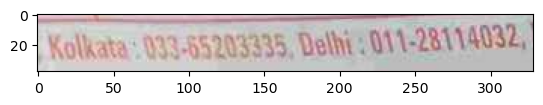

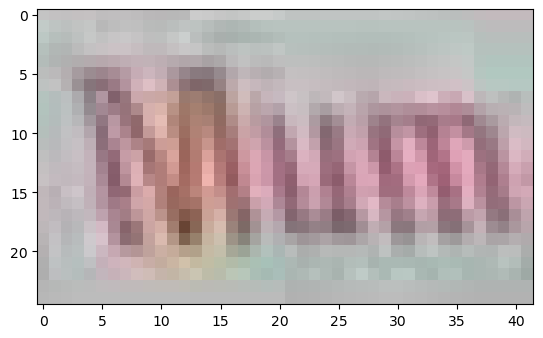

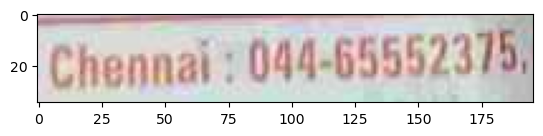

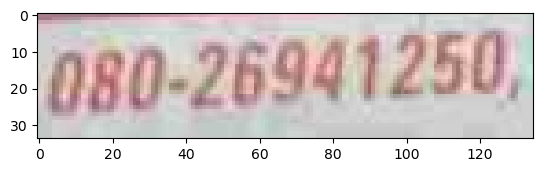

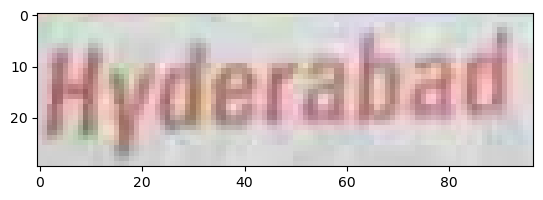

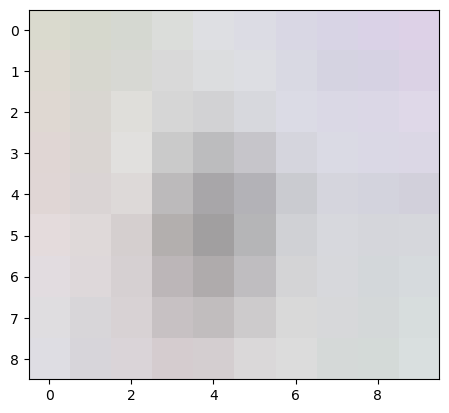

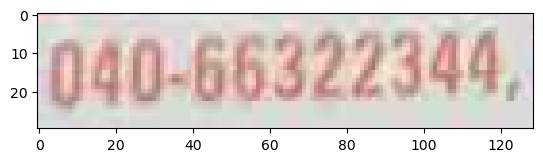

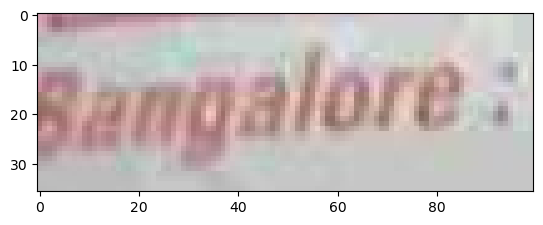

In [16]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import cv2
import matplotlib.pyplot as plt

def ocr_and_crop(image_path):
    # Load the image
    doc = DocumentFile.from_images(image_path)
    
    # Initialize OCR model
    model = ocr_predictor(pretrained=True)
    
    # Perform OCR
    result = model(doc)
    
    # Get the first page's layout (bounding boxes and text)
    page = result.pages[0]
    
    # Load the image with OpenCV (needed for cropping)
    image = cv2.imread(image_path)
    
    cropped_images = []
    
    # Iterate through the OCR elements (blocks, lines, words) and extract the bounding boxes
    for block in page.blocks:
        for line in block.lines:
            for word in line.words:
                # Extract bounding box coordinates
                (x1, y1), (x2, y2) = word.geometry
                h, w, _ = image.shape
                
                # Convert normalized coordinates (0-1) to image coordinates
                start_x, start_y = int(x1 * w), int(y1 * h)
                end_x, end_y = int(x2 * w), int(y2 * h)
                
                # Crop the region from the image
                cropped = image[start_y:end_y, start_x:end_x]
                cropped_images.append(cropped)
                
                # Optionally, display the cropped image
                plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
                plt.show()

    return cropped_images

if __name__ == "__main__":
    image_path = "C:\\Users\\user\\Desktop\\POD\\435511711 worng pod.jpg"  # Replace with your image file path
    cropped_regions = ocr_and_crop(image_path)


In [ ]:
import cv2
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

# Initialize global variables to store cropping coordinates
ref_point = []
cropped_image = None

def select_region(event, x, y, flags, param):
    global ref_point, cropped_image
    
    # Record the starting (x, y) point when the left mouse button is clicked
    if event == cv2.EVENT_LBUTTONDOWN:
        ref_point = [(x, y)]
    
    # Record the ending (x, y) point when the left mouse button is released
    elif event == cv2.EVENT_LBUTTONUP:
        ref_point.append((x, y))
        
        # Draw a rectangle around the selected region
        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
        cv2.imshow("Image", image)

def crop_selected_area(image_path):
    global image, cropped_image
    
    # Load the image using doctr
    doc = DocumentFile.from_images(image_path)
    
    # Initialize the OCR model
    model = ocr_predictor(pretrained=True)
    result = model(doc)
    
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    
    # Show the image and allow user to select region
    cv2.imshow("Image", image)
    
    # Set the mouse callback function to 'select_region'
    cv2.setMouseCallback("Image", select_region)
    
    print("Select a region by clicking and dragging the cursor. Press 'c' to crop and 'q' to quit.")
    
    while True:
        key = cv2.waitKey(1) & 0xFF
        
        # Press 'c' to crop the selected region
        if key == ord("c") and len(ref_point) == 2:
            start_x, start_y = ref_point[0]
            end_x, end_y = ref_point[1]
            
            # Crop the region from the image
            cropped_image = image[start_y:end_y, start_x:end_x]
            
            # Show the cropped region
            cv2.imshow("Cropped Image", cropped_image)
        
        # Press 'q' to exit
        elif key == ord("q"):
            break
    
    # Close all OpenCV windows
    cv2.destroyAllWindows()
    
    # Return the cropped image
    return cropped_image

if __name__ == "__main__":
    image_path = "C:\\Users\\user\\Desktop\\POD\\435511711 worng pod.jpg"  # Replace with your image file path
    cropped_img = crop_selected_area(image_path)
    
    # Save or further process the cropped image if needed
    if cropped_img is not None:
        cv2.imwrite("cropped_output.png", cropped_img)
        print("Cropped image saved as 'cropped_output.png'.")


In [2]:
from PIL import Image

# Open an image file
img = Image.open('C:\\Users\\user\\Desktop\\POD\\PR24006866 POD.jpg')

# Define the crop rectangle (left, upper, right, lower)
crop_area = (100, 100, 400, 400)

# Crop the image
cropped_img = img.crop(crop_area)

# Save the cropped image
cropped_img.save('cropped_image.jpg')

# Show the cropped image
cropped_img.show()


In [5]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from PIL import Image, ImageDraw

# Load the JPG image
img = Image.open('C:\\Users\\user\\Desktop\\POD\\PR24006866 POD.jpg')

# Convert the image to a doctr document
doc = DocumentFile.from_images('C:\\Users\\user\\Desktop\\POD\\PR24006866 POD.jpg')

# Initialize the OCR predictor (detects both text areas and recognizes text)
predictor = ocr_predictor(pretrained=True)

# Perform OCR on the document
result = predictor(doc)

# Access the recognized words along with their bounding boxes
# Assuming that you want to filter or select a specific text
for page in result.pages:
    for block in page.blocks:
        for line in block.lines:
            for word in line.words:
                # Example: Crop the image around the word "specific_text"
                if word.value == "specific_text":
                    # The bounding box of the text (relative coordinates, as a fraction of width/height)
                    bbox = word.geometry

                    # Convert relative bbox to pixel coordinates for cropping
                    left = int(bbox[0][0] * img.width)
                    top = int(bbox[0][1] * img.height)
                    right = int(bbox[1][0] * img.width)
                    bottom = int(bbox[1][1] * img.height)

                    # Crop the region containing the specific text
                    cropped_img = img.crop((left, top, right, bottom))

                    # Save or display the cropped image
                    cropped_img.save('cropped_specific_text.jpg')
                    cropped_img.show()


c:\Users\user\anaconda3\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location=

In [1]:
import cv2
from PIL import Image

# Global variables to store the start and end points of the rectangle
ref_point = []
cropping = False

def click_and_crop(event, x, y, flags, param):
    global ref_point, cropping

    # If the left mouse button was clicked, record the starting point
    if event == cv2.EVENT_LBUTTONDOWN:
        ref_point = [(x, y)]
        cropping = True

    # If the left mouse button is released, record the ending point and crop the region
    elif event == cv2.EVENT_LBUTTONUP:
        ref_point.append((x, y))
        cropping = False

        # Draw a rectangle around the selected region
        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
        cv2.imshow("image", image)

# Load the image
image_path = 'C:\\Users\\user\\Desktop\\POD\\435511711 worng pod.jpg'
image = cv2.imread(image_path)
clone = image.copy()

cv2.namedWindow("image")
cv2.setMouseCallback("image", click_and_crop)

# Keep looping until the user presses 'q' key
while True:
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # If the 'r' key is pressed, reset the cropping region
    if key == ord("r"):
        image = clone.copy()

    # If the 'c' key is pressed, break the loop
    elif key == ord("c"):
        break

# If there are two reference points, then crop the region and display it
if len(ref_point) == 2:
    cropped_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:ref_point[1][0]]
    cv2.imshow("Cropped Image", cropped_img)
    cv2.waitKey(0)

    # Save the cropped image using Pillow
    cropped_pil_img = Image.fromarray(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    cropped_pil_img.save("cropped.jpg")

# Close all open windows
cv2.destroyAllWindows()


In [9]:
import cv2
import pytesseract
from PIL import Image

# Initialize the list of reference points and cropping flag
ref_point = []
cropping = False

def click_and_crop(event, x, y, flags, param):
    global ref_point, cropping

    # If the left mouse button is clicked, record the starting point
    if event == cv2.EVENT_LBUTTONDOWN:
        ref_point = [(x, y)]
        cropping = True

    # If the left mouse button is released, record the ending point
    elif event == cv2.EVENT_LBUTTONUP:
        ref_point.append((x, y))
        cropping = False

        # Draw a rectangle around the region of interest
        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
        cv2.imshow("image", image)

# Load the image
image_path = "C:\\Users\\user\\Desktop\\POD\\22383851545 no seal.jpg"
image = cv2.imread(image_path)
clone = image.copy()

cv2.namedWindow("image")
cv2.setMouseCallback("image", click_and_crop)

# Keep looping until the user presses the 'c' key
while True:
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # If the 'r' key is pressed, reset the cropping region
    if key == ord("r"):
        image = clone.copy()

    # If the 'c' key is pressed, break the loop
    elif key == ord("c"):
        break

# If there are two reference points, crop the region and perform OCR
if len(ref_point) == 2:
    # Crop the selected region
    cropped_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:ref_point[1][0]]

    # Convert the cropped image to PIL format (required for pytesseract)
    cropped_pil_img = Image.fromarray(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

    # Use pytesseract to perform OCR on the cropped image
    text = pytesseract.image_to_string(cropped_pil_img)

    # Print or display the recognized text
    print("Recognized Text:")
    print(text)

    # Show the cropped image with recognized text
    cv2.imshow("Cropped Image", cropped_img)
    cv2.waitKey(0)

# Close all open windows
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 

In [1]:
import cv2
import pytesseract
from PIL import Image
import re

# Path to tesseract executable (update if necessary)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def preprocess_image(image_path):
    """
    Preprocess the image for better OCR results.
    
    :param image_path: Path to the image file.
    :return: Preprocessed image.
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding
    _, thresh_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV)
    
    return thresh_image

def extract_text(image):
    """
    Extract text from the image using pytesseract.
    
    :param image: Preprocessed image.
    :return: Extracted text.
    """
    # Convert to PIL image
    pil_image = Image.fromarray(image)
    
    # Perform OCR
    text = pytesseract.image_to_string(pil_image)
    return text

def extract_invoice_details(text):
    """
    Extract invoice details from the extracted text using regex patterns.
    
    :param text: Extracted text from the invoice.
    :return: Extracted details.
    """
    invoice_number_pattern = r'Invoice Number:\s*(\S+)'
    total_amount_pattern = r'Total Amount:\s*\$?(\d+\.\d{2})'

    invoice_number = re.search(invoice_number_pattern, text, re.IGNORECASE)
    total_amount = re.search(total_amount_pattern, text, re.IGNORECASE)

    return {
        'invoice_number': invoice_number.group(1) if invoice_number else 'Not Found',
        'total_amount': total_amount.group(1) if total_amount else 'Not Found',
    }

def main(image_path):
    """
    Main function to run the OCR and extraction process.
    
    :param image_path: Path to the invoice image.
    """
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    if preprocessed_image is None:
        return

    # Extract text from the image
    text = extract_text(preprocessed_image)

    # Extract invoice details
    details = extract_invoice_details(text)
    
    # Print extracted details
    print("Extracted Details:")
    print(f"Invoice Number: {details['invoice_number']}")
    print(f"Total Amount: {details['total_amount']}")

# Path to your invoice image
invoice_image_path = ''
main(invoice_image_path)


Extracted Details:
Invoice Number: Not Found
Total Amount: Not Found


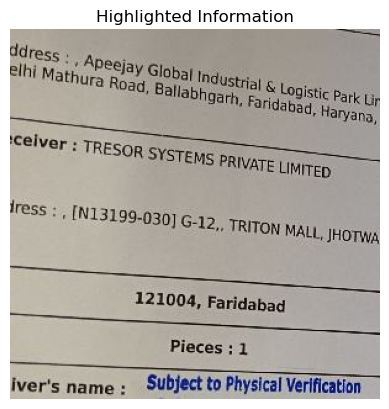

Processed image saved as highlighted_image.png


In [3]:
import cv2
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import matplotlib.pyplot as plt

# Function to draw boxes around the required information
def highlight_info(image, boxes, keyword):
    for box, text in boxes:
        if keyword.lower() in text.lower():
            # Unpack the bounding box coordinates
            (x1, y1), (x2, y2) = box
            # Convert normalized coordinates (0-1) to pixel coordinates
            h, w, _ = image.shape
            (x1, y1, x2, y2) = int(x1 * w), int(y1 * h), int(x2 * w), int(y2 * h)
            # Draw a rectangle around the matching text
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Put the matched text label
            cv2.putText(image, keyword, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Function to extract and highlight information
def process_file(file_path, keywords):
    # Load the image
    image = cv2.imread(file_path)
    
    # Perform OCR using Doctr
    doc = DocumentFile.from_images([file_path])
    model = ocr_predictor(pretrained=True)
    result = model(doc)

    # Extract text boxes and corresponding text
    page = result.pages[0]
    boxes_and_text = [(word.geometry, word.value) for block in page.blocks for line in block.lines for word in line.words]

    # Highlight each keyword
    for keyword in keywords:
        highlight_info(image, boxes_and_text, keyword)

    # Save the image with highlighted information
    output_file = "highlighted_image.png"
    cv2.imwrite(output_file, image)

    # Show the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Highlighted Information')
    plt.axis('off')
    plt.show()

    print(f"Processed image saved as {output_file}")

# Main function
if __name__ == "__main__":
    # Get file path from the user
    file_path = input("Enter the path of the image file: ")

    # Get the required information from the user
    keywords = input("Enter the keywords to highlight (comma separated): ").split(",")

    # Process the file
    process_file(file_path, keywords)


In [4]:
import cv2
import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.utils.visualization import visualize_page

# Initialize the OCR model using doctr
ocr_model = ocr_predictor(pretrained=True)

# Function to extract and mark important info
def extract_and_mark_info(image, predictions):
    address_keywords = ['address', 'location']  # Keywords to detect address
    invoice_keywords = ['invoice', 'bill no']   # Keywords to detect invoice number
    amount_keywords = ['total', 'amount']       # Keywords to detect total amount

    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    height, width = image.shape[:2]

    for page, prediction in enumerate(predictions.pages):
        for block in prediction.blocks:
            for line in block.lines:
                for word in line.words:
                    word_lower = word.value.lower()

                    # Check for invoice number
                    if any(keyword in word_lower for keyword in invoice_keywords):
                        draw_bounding_box(image_bgr, word, width, height, color=(0, 255, 0), label="Invoice No")

                    # Check for total amount
                    if any(keyword in word_lower for keyword in amount_keywords):
                        draw_bounding_box(image_bgr, word, width, height, color=(255, 0, 0), label="Total Amount")

                    # Check for address
                    if any(keyword in word_lower for keyword in address_keywords):
                        draw_bounding_box(image_bgr, word, width, height, color=(0, 0, 255), label="Address")

    # Save and display the marked image
    output_path = 'marked_invoice.jpg'
    cv2.imwrite(output_path, image_bgr)
    print(f"Marked image saved as {output_path}")

    # Display the image with highlighted info
    plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Highlighted Invoice Info")
    plt.axis('off')
    plt.show()

# Function to draw bounding boxes around the detected text
def draw_bounding_box(image, word, width, height, color, label):
    (xmin, ymin, xmax, ymax) = word.geometry

    # Convert the relative coordinates to absolute coordinates
    start_point = (int(xmin * width), int(ymin * height))
    end_point = (int(xmax * width), int(ymax * height))

    # Draw the bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)

    # Add a label to the bounding box
    cv2.putText(image, label, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Main function to run the OCR process
def main():
    # Get the image file path from the user
    image_path = input("Enter the image file path: ")

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Invalid image path.")
        return

    # Perform OCR using doctr
    doc = DocumentFile.from_images(image_path)
    result = ocr_model(doc)

    # Mark the important information (invoice number, total amount, address)
    extract_and_mark_info(image, result)

if __name__ == "__main__":
    main()


ValueError: not enough values to unpack (expected 4, got 2)

Marked image saved as marked_invoice.jpg


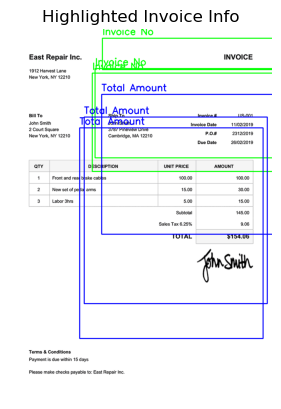

In [5]:
import cv2
import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.utils.visualization import visualize_page

# Initialize the OCR model using doctr
ocr_model = ocr_predictor(pretrained=True)

# Function to extract and mark important info
def extract_and_mark_info(image, predictions):
    address_keywords = ['address', 'location']  # Keywords to detect address
    invoice_keywords = ['invoice', 'bill no']   # Keywords to detect invoice number
    amount_keywords = ['total', 'amount']       # Keywords to detect total amount

    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    height, width = image.shape[:2]

    for page, prediction in enumerate(predictions.pages):
        for block in prediction.blocks:
            for line in block.lines:
                for word in line.words:
                    word_lower = word.value.lower()

                    # Check for invoice number
                    if any(keyword in word_lower for keyword in invoice_keywords):
                        draw_bounding_box(image_bgr, word, width, height, color=(0, 255, 0), label="Invoice No")

                    # Check for total amount
                    if any(keyword in word_lower for keyword in amount_keywords):
                        draw_bounding_box(image_bgr, word, width, height, color=(255, 0, 0), label="Total Amount")

                    # Check for address
                    if any(keyword in word_lower for keyword in address_keywords):
                        draw_bounding_box(image_bgr, word, width, height, color=(0, 0, 255), label="Address")

    # Save and display the marked image
    output_path = 'marked_invoice.jpg'
    cv2.imwrite(output_path, image_bgr)
    print(f"Marked image saved as {output_path}")

    # Display the image with highlighted info
    plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Highlighted Invoice Info")
    plt.axis('off')
    plt.show()

# Function to draw bounding boxes around the detected text
def draw_bounding_box(image, word, width, height, color, label):
    geometry = word.geometry
    if len(geometry) == 4:
        # If the geometry contains four values (xmin, ymin, xmax, ymax)
        (xmin, ymin, xmax, ymax) = geometry
    elif len(geometry) == 2:
        # If the geometry contains two values (center and size), calculate bounding box
        (center, size) = geometry
        xmin = center[0] - size[0] / 2
        ymin = center[1] - size[1] / 2
        xmax = center[0] + size[0] / 2
        ymax = center[1] + size[1] / 2

    # Convert the relative coordinates to absolute coordinates
    start_point = (int(xmin * width), int(ymin * height))
    end_point = (int(xmax * width), int(ymax * height))

    # Draw the bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)

    # Add a label to the bounding box
    cv2.putText(image, label, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Main function to run the OCR process
def main():
    # Get the image file path from the user
    image_path = input("Enter the image file path: ")

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Invalid image path.")
        return

    # Perform OCR using doctr
    doc = DocumentFile.from_images(image_path)
    result = ocr_model(doc)

    # Mark the important information (invoice number, total amount, address)
    extract_and_mark_info(image, result)

if __name__ == "__main__":
    main()


Marked image saved as marked_invoice_optimized.jpg


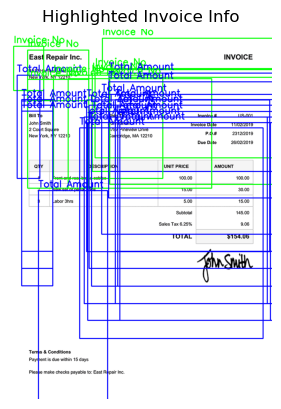

In [6]:
import cv2
import re
import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

# Initialize the OCR model using doctr
ocr_model = ocr_predictor(pretrained=True)

# Keywords and patterns for important information
invoice_keywords = ['invoice', 'inv', 'bill no', 'invoice number']
amount_keywords = ['total', 'amount', 'grand total', 'total due']
address_keywords = ['address', 'location', 'company address']

# Regular expression patterns for detecting amounts and invoice numbers
amount_pattern = re.compile(r'\b\d{1,3}(?:,\d{3})*(?:\.\d{2})?\b')  # Amount format: 123,456.78
invoice_number_pattern = re.compile(r'\b\d{4,}\b')  # Invoice number format: 4+ digits

# Function to extract and mark important info
def extract_and_mark_info(image, predictions):
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    height, width = image.shape[:2]

    for page, prediction in enumerate(predictions.pages):
        for block in prediction.blocks:
            for line in block.lines:
                for word in line.words:
                    word_lower = word.value.lower()

                    # Check for invoice number
                    if any(keyword in word_lower for keyword in invoice_keywords) or re.match(invoice_number_pattern, word.value):
                        draw_bounding_box(image_bgr, word, width, height, color=(0, 255, 0), label="Invoice No")

                    # Check for total amount
                    if any(keyword in word_lower for keyword in amount_keywords) or re.match(amount_pattern, word.value):
                        draw_bounding_box(image_bgr, word, width, height, color=(255, 0, 0), label="Total Amount")

                    # Check for company address
                    if any(keyword in word_lower for keyword in address_keywords):
                        draw_bounding_box(image_bgr, word, width, height, color=(0, 0, 255), label="Address")

    # Save and display the marked image
    output_path = 'marked_invoice_optimized.jpg'
    cv2.imwrite(output_path, image_bgr)
    print(f"Marked image saved as {output_path}")

    # Display the image with highlighted info
    plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Highlighted Invoice Info")
    plt.axis('off')
    plt.show()

# Function to draw bounding boxes around the detected text
def draw_bounding_box(image, word, width, height, color, label):
    geometry = word.geometry
    if len(geometry) == 4:
        # If the geometry contains four values (xmin, ymin, xmax, ymax)
        (xmin, ymin, xmax, ymax) = geometry
    elif len(geometry) == 2:
        # If the geometry contains two values (center and size), calculate bounding box
        (center, size) = geometry
        xmin = center[0] - size[0] / 2
        ymin = center[1] - size[1] / 2
        xmax = center[0] + size[0] / 2
        ymax = center[1] + size[1] / 2

    # Convert the relative coordinates to absolute coordinates
    start_point = (int(xmin * width), int(ymin * height))
    end_point = (int(xmax * width), int(ymax * height))

    # Draw the bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)

    # Add a label to the bounding box
    cv2.putText(image, label, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Main function to run the OCR process
def main():
    # Get the image file path from the user
    image_path = input("Enter the image file path: ")

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Invalid image path.")
        return

    # Perform OCR using doctr
    doc = DocumentFile.from_images(image_path)
    result = ocr_model(doc)

    # Mark the important information (invoice number, total amount, address)
    extract_and_mark_info(image, result)

if __name__ == "__main__":
    main()


In [7]:
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.utils.visualization import visualize_page

# Initialize the OCR model using doctr
ocr_model = ocr_predictor(pretrained=True)

# Regular expression for detecting amounts
amount_pattern = re.compile(r'\b\d{1,3}(?:,\d{3})*(?:\.\d{2})?\b')  # Format: 123,456.78
invoice_number_pattern = re.compile(r'\b\d{4,}\b')  # Invoice number format: 4+ digits

# Placeholder for training data (features and labels)
training_features = []
training_labels = []

# Function to extract features from OCR data for machine learning model
def extract_features(text, position, context_text):
    # Example feature extraction (you can add more sophisticated features)
    features = {
        "text": text,
        "is_amount": bool(re.match(amount_pattern, text)),
        "is_invoice": bool(re.match(invoice_number_pattern, text)),
        "has_currency": "$" in text or "€" in text or "₹" in text,  # Detect currency symbols
        "text_length": len(text),
        "distance_from_keywords": distance_from_keywords(context_text),
        "position_x": position[0],  # Relative position on the X axis
        "position_y": position[1],  # Relative position on the Y axis
    }
    return features

# Helper function to find distance from keywords like "Total", "Invoice"
def distance_from_keywords(context_text):
    keywords = ['total', 'invoice', 'bill']
    for keyword in keywords:
        if keyword in context_text.lower():
            return 1
    return 0

# Function to train a machine learning model to detect total amounts and invoice numbers
def train_ml_model(training_data):
    # Train a classifier (Random Forest here)
    clf = RandomForestClassifier()

    # Extract features and labels from the training data
    feature_vectors = [extract_features(data['text'], data['position'], data['context']) for data in training_data]
    labels = [data['label'] for data in training_data]

    # Fit the classifier on the extracted features and labels
    clf.fit(feature_vectors, labels)
    return clf

# Function to apply the ML model on new invoices
def apply_model(image, clf):
    # Perform OCR using doctr
    doc = DocumentFile.from_images(image)
    result = ocr_model(doc)

    # Extract OCR text and positions
    for page, prediction in enumerate(result.pages):
        for block in prediction.blocks:
            for line in block.lines:
                context_text = " ".join([word.value for word in line.words])
                for word in line.words:
                    position = word.geometry[:2]  # Get relative position (x, y)
                    features = extract_features(word.value, position, context_text)

                    # Predict whether the word is "Total Amount" or "Invoice Number"
                    prediction = clf.predict([features])
                    if prediction == "total":
                        draw_bounding_box(image, word, color=(0, 255, 0), label="Total Amount")
                    elif prediction == "invoice":
                        draw_bounding_box(image, word, color=(255, 0, 0), label="Invoice Number")

    # Save the marked image
    output_path = "marked_invoice_with_ml.jpg"
    cv2.imwrite(output_path, image)
    print(f"Marked invoice saved as {output_path}")

# Function to draw bounding boxes
def draw_bounding_box(image, word, color, label):
    geometry = word.geometry
    (xmin, ymin, xmax, ymax) = geometry
    height, width = image.shape[:2]
    start_point = (int(xmin * width), int(ymin * height))
    end_point = (int(xmax * width), int(ymax * height))

    # Draw bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)
    cv2.putText(image, label, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Example main function
def main():
    # Load the invoice image
    image_path = input("Enter the image path: ")
    image = cv2.imread(image_path)

    # Training data placeholder (you would use real labeled invoice data here)
    training_data = [
        {"text": "123,456.78", "position": (0.5, 0.9), "context": "Total Amount", "label": "total"},
        {"text": "456789", "position": (0.1, 0.2), "context": "Invoice No", "label": "invoice"},
        # Add more labeled data here
    ]

    # Train the model
    clf = train_ml_model(training_data)

    # Apply the trained model to a new invoice image
    apply_model(image, clf)

if __name__ == "__main__":
    main()


c:\Users\user\anaconda3\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location=

TypeError: float() argument must be a string or a real number, not 'dict'

In [8]:
import cv2
import re
from sklearn.ensemble import RandomForestClassifier
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import numpy as np

# Initialize the OCR model using doctr
ocr_model = ocr_predictor(pretrained=True)

# Regular expressions for detecting amounts and invoice numbers
amount_pattern = re.compile(r'\b\d{1,3}(?:,\d{3})*(?:\.\d{2})?\b')  # Format: 123,456.78
invoice_number_pattern = re.compile(r'\b\d{4,}\b')  # Invoice number format: 4+ digits

# Function to extract features from text and position
def extract_features(text, position, context_text):
    # Extract numerical and boolean features as a flat list
    is_amount = 1 if re.match(amount_pattern, text) else 0
    is_invoice = 1 if re.match(invoice_number_pattern, text) else 0
    has_currency = 1 if "$" in text or "€" in text or "₹" in text else 0
    text_length = len(text)
    distance_from_keywords = 1 if any(keyword in context_text.lower() for keyword in ['total', 'invoice', 'bill']) else 0

    # Add positional features (x, y coordinates)
    position_x, position_y = position

    # Return features as a flat list
    return [is_amount, is_invoice, has_currency, text_length, distance_from_keywords, position_x, position_y]

# Function to train a machine learning model to detect total amounts and invoice numbers
def train_ml_model(training_data):
    # Train a classifier (Random Forest here)
    clf = RandomForestClassifier()

    # Extract features and labels from the training data
    feature_vectors = [extract_features(data['text'], data['position'], data['context']) for data in training_data]
    labels = [data['label'] for data in training_data]

    # Fit the classifier on the extracted features and labels
    clf.fit(feature_vectors, labels)
    return clf

# Function to apply the ML model on new invoices
def apply_model(image, clf):
    # Perform OCR using doctr
    doc = DocumentFile.from_images(image)
    result = ocr_model(doc)

    # Extract OCR text and positions
    for page, prediction in enumerate(result.pages):
        for block in prediction.blocks:
            for line in block.lines:
                context_text = " ".join([word.value for word in line.words])
                for word in line.words:
                    position = word.geometry[:2]  # Get relative position (x, y)
                    features = extract_features(word.value, position, context_text)

                    # Predict whether the word is "Total Amount" or "Invoice Number"
                    prediction = clf.predict([features])
                    if prediction == "total":
                        draw_bounding_box(image, word, color=(0, 255, 0), label="Total Amount")
                    elif prediction == "invoice":
                        draw_bounding_box(image, word, color=(255, 0, 0), label="Invoice Number")

    # Save the marked image
    output_path = "marked_invoice_with_ml.jpg"
    cv2.imwrite(output_path, image)
    print(f"Marked invoice saved as {output_path}")

# Function to draw bounding boxes
def draw_bounding_box(image, word, color, label):
    geometry = word.geometry
    (xmin, ymin, xmax, ymax) = geometry
    height, width = image.shape[:2]
    start_point = (int(xmin * width), int(ymin * height))
    end_point = (int(xmax * width), int(ymax * height))

    # Draw bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)
    cv2.putText(image, label, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Example main function
def main():
    # Load the invoice image
    image_path = input("Enter the image path: ")
    image = cv2.imread(image_path)

    # Training data placeholder (you would use real labeled invoice data here)
    training_data = [
        {"text": "123,456.78", "position": (0.5, 0.9), "context": "Total Amount", "label": "total"},
        {"text": "456789", "position": (0.1, 0.2), "context": "Invoice No", "label": "invoice"},
        # Add more labeled data here
    ]

    # Train the model
    clf = train_ml_model(training_data)

    # Apply the trained model to a new invoice image
    apply_model(image, clf)

if __name__ == "__main__":
    main()


c:\Users\user\anaconda3\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location=

TypeError: unsupported object type for argument 'file'

In [9]:
import cv2
import re
from sklearn.ensemble import RandomForestClassifier
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import numpy as np

# Initialize the OCR model using doctr
ocr_model = ocr_predictor(pretrained=True)

# Regular expressions for detecting amounts and invoice numbers
amount_pattern = re.compile(r'\b\d{1,3}(?:,\d{3})*(?:\.\d{2})?\b')  # Format: 123,456.78
invoice_number_pattern = re.compile(r'\b\d{4,}\b')  # Invoice number format: 4+ digits

# Function to extract features from text and position
def extract_features(text, position, context_text):
    # Extract numerical and boolean features as a flat list
    is_amount = 1 if re.match(amount_pattern, text) else 0
    is_invoice = 1 if re.match(invoice_number_pattern, text) else 0
    has_currency = 1 if "$" in text or "€" in text or "₹" in text else 0
    text_length = len(text)
    distance_from_keywords = 1 if any(keyword in context_text.lower() for keyword in ['total', 'invoice', 'bill']) else 0

    # Add positional features (x, y coordinates)
    position_x, position_y = position

    # Return features as a flat list
    return [is_amount, is_invoice, has_currency, text_length, distance_from_keywords, position_x, position_y]

# Function to train a machine learning model to detect total amounts and invoice numbers
def train_ml_model(training_data):
    # Train a classifier (Random Forest here)
    clf = RandomForestClassifier()

    # Extract features and labels from the training data
    feature_vectors = [extract_features(data['text'], data['position'], data['context']) for data in training_data]
    labels = [data['label'] for data in training_data]

    # Fit the classifier on the extracted features and labels
    clf.fit(feature_vectors, labels)
    return clf

# Function to apply the ML model on new invoices
def apply_model(image_path, clf):
    # Perform OCR using doctr
    doc = DocumentFile.from_images(image_path)  # Pass the image path here
    result = ocr_model(doc)

    # Extract OCR text and positions
    for page, prediction in enumerate(result.pages):
        for block in prediction.blocks:
            for line in block.lines:
                context_text = " ".join([word.value for word in line.words])
                for word in line.words:
                    position = word.geometry[:2]  # Get relative position (x, y)
                    features = extract_features(word.value, position, context_text)

                    # Predict whether the word is "Total Amount" or "Invoice Number"
                    prediction = clf.predict([features])
                    if prediction == "total":
                        draw_bounding_box(image_path, word, color=(0, 255, 0), label="Total Amount")
                    elif prediction == "invoice":
                        draw_bounding_box(image_path, word, color=(255, 0, 0), label="Invoice Number")

    # Save the marked image
    output_path = "marked_invoice_with_ml.jpg"
    print(f"Marked invoice saved as {output_path}")

# Function to draw bounding boxes
def draw_bounding_box(image_path, word, color, label):
    image = cv2.imread(image_path)  # Read the image using OpenCV
    geometry = word.geometry
    (xmin, ymin, xmax, ymax) = geometry
    height, width = image.shape[:2]
    start_point = (int(xmin * width), int(ymin * height))
    end_point = (int(xmax * width), int(ymax * height))

    # Draw bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)
    cv2.putText(image, label, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    # Save the image with bounding boxes
    output_image_path = 'marked_' + image_path
    cv2.imwrite(output_image_path, image)

# Example main function
def main():
    # Get the invoice image path
    image_path = input("Enter the image path: ")

    # Training data placeholder (you would use real labeled invoice data here)
    training_data = [
        {"text": "123,456.78", "position": (0.5, 0.9), "context": "Total Amount", "label": "total"},
        {"text": "456789", "position": (0.1, 0.2), "context": "Invoice No", "label": "invoice"},
        # Add more labeled data here
    ]

    # Train the model
    clf = train_ml_model(training_data)

    # Apply the trained model to a new invoice image
    apply_model(image_path, clf)

if __name__ == "__main__":
    main()


c:\Users\user\anaconda3\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location=

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 7) + inhomogeneous part.

In [10]:
import cv2
import re
from sklearn.ensemble import RandomForestClassifier
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import numpy as np

# Initialize the OCR model using doctr
ocr_model = ocr_predictor(pretrained=True)

# Regular expressions for detecting amounts and invoice numbers
amount_pattern = re.compile(r'\b\d{1,3}(?:,\d{3})*(?:\.\d{2})?\b')  # Format: 123,456.78
invoice_number_pattern = re.compile(r'\b\d{4,}\b')  # Invoice number format: 4+ digits

# Function to extract features from text and position
def extract_features(text, position, context_text):
    # Extract numerical and boolean features as a flat list
    is_amount = 1 if re.match(amount_pattern, text) else 0
    is_invoice = 1 if re.match(invoice_number_pattern, text) else 0
    has_currency = 1 if "$" in text or "€" in text or "₹" in text else 0
    text_length = len(text)
    distance_from_keywords = 1 if any(keyword in context_text.lower() for keyword in ['total', 'invoice', 'bill']) else 0

    # Add positional features (x, y coordinates)
    position_x, position_y = position

    # Convert all features to a fixed-length flat array
    return [float(is_amount), float(is_invoice), float(has_currency), float(text_length),
            float(distance_from_keywords), float(position_x), float(position_y)]

# Function to train a machine learning model to detect total amounts and invoice numbers
def train_ml_model(training_data):
    # Train a classifier (Random Forest here)
    clf = RandomForestClassifier()

    # Extract features and labels from the training data
    feature_vectors = [extract_features(data['text'], data['position'], data['context']) for data in training_data]
    labels = [data['label'] for data in training_data]

    # Fit the classifier on the extracted features and labels
    clf.fit(feature_vectors, labels)
    return clf

# Function to apply the ML model on new invoices
def apply_model(image_path, clf):
    # Perform OCR using doctr
    doc = DocumentFile.from_images(image_path)  # Pass the image path here
    result = ocr_model(doc)

    # Extract OCR text and positions
    for page, prediction in enumerate(result.pages):
        for block in prediction.blocks:
            for line in block.lines:
                context_text = " ".join([word.value for word in line.words])
                for word in line.words:
                    position = word.geometry[:2]  # Get relative position (x, y)
                    features = extract_features(word.value, position, context_text)

                    # Ensure the feature vector is in the correct shape (1, 7)
                    features = np.array(features).reshape(1, -1)

                    # Predict whether the word is "Total Amount" or "Invoice Number"
                    prediction = clf.predict(features)
                    if prediction == "total":
                        draw_bounding_box(image_path, word, color=(0, 255, 0), label="Total Amount")
                    elif prediction == "invoice":
                        draw_bounding_box(image_path, word, color=(255, 0, 0), label="Invoice Number")

    # Save the marked image
    output_path = "marked_invoice_with_ml.jpg"
    print(f"Marked invoice saved as {output_path}")

# Function to draw bounding boxes
def draw_bounding_box(image_path, word, color, label):
    image = cv2.imread(image_path)  # Read the image using OpenCV
    geometry = word.geometry
    (xmin, ymin, xmax, ymax) = geometry
    height, width = image.shape[:2]
    start_point = (int(xmin * width), int(ymin * height))
    end_point = (int(xmax * width), int(ymax * height))

    # Draw bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)
    cv2.putText(image, label, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    # Save the image with bounding boxes
    output_image_path = 'marked_' + image_path
    cv2.imwrite(output_image_path, image)

# Example main function
def main():
    # Get the invoice image path
    image_path = input("Enter the image path: ")

    # Training data placeholder (you would use real labeled invoice data here)
    training_data = [
        {"text": "123,456.78", "position": (0.5, 0.9), "context": "Total Amount", "label": "total"},
        {"text": "456789", "position": (0.1, 0.2), "context": "Invoice No", "label": "invoice"},
        # Add more labeled data here
    ]

    # Train the model
    clf = train_ml_model(training_data)

    # Apply the trained model to a new invoice image
    apply_model(image_path, clf)

if __name__ == "__main__":
    main()


c:\Users\user\anaconda3\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location=

TypeError: float() argument must be a string or a real number, not 'tuple'

In [11]:
import cv2
import re
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

# Initialize the OCR model using doctr
ocr_model = ocr_predictor(pretrained=True)

# Regular expressions for detecting amounts and invoice numbers
amount_pattern = re.compile(r'\b\d{1,3}(?:,\d{3})*(?:\.\d{2})?\b')  # Format: 123,456.78
invoice_number_pattern = re.compile(r'\b\d{4,}\b')  # Invoice number format: 4+ digits

# Function to extract features from text and position
def extract_features(text, word_geometry, context_text):
    """
    Extract features from the recognized text and its geometry.
    
    Parameters:
    - text: The recognized word.
    - word_geometry: The geometry of the word (bounding box).
    - context_text: The full line of text containing the word.
    
    Returns:
    - A list of numerical features.
    """
    # Feature 1: Is the text an amount?
    is_amount = 1 if re.match(amount_pattern, text) else 0
    
    # Feature 2: Is the text an invoice number?
    is_invoice = 1 if re.match(invoice_number_pattern, text) else 0
    
    # Feature 3: Does the text contain a currency symbol?
    has_currency = 1 if any(symbol in text for symbol in ["$", "€", "₹"]) else 0
    
    # Feature 4: Length of the text
    text_length = len(text)
    
    # Feature 5: Does the context contain keywords indicating importance?
    distance_from_keywords = 1 if any(keyword in context_text.lower() for keyword in ['total', 'invoice', 'bill']) else 0

    # Handle different geometry formats
    if len(word_geometry) == 4:
        xmin, ymin, xmax, ymax = word_geometry
    elif len(word_geometry) == 2:
        center, size = word_geometry
        xmin = center[0] - size[0] / 2
        ymin = center[1] - size[1] / 2
        xmax = center[0] + size[0] / 2
        ymax = center[1] + size[1] / 2
    else:
        # Default values if geometry is not as expected
        xmin, ymin, xmax, ymax = 0, 0, 0, 0

    # Feature 6: Relative X position (normalized)
    position_x = xmin
    
    # Feature 7: Relative Y position (normalized)
    position_y = ymin

    # Return all features as floats
    return [
        float(is_amount),
        float(is_invoice),
        float(has_currency),
        float(text_length),
        float(distance_from_keywords),
        float(position_x),
        float(position_y)
    ]

# Function to train a machine learning model to detect total amounts and invoice numbers
def train_ml_model(training_data):
    """
    Train a RandomForestClassifier on the provided training data.
    
    Parameters:
    - training_data: A list of dictionaries containing 'text', 'geometry', 'context', and 'label'.
    
    Returns:
    - Trained RandomForestClassifier model.
    """
    clf = RandomForestClassifier()

    # Extract features and labels from the training data
    feature_vectors = [
        extract_features(data['text'], data['geometry'], data['context'])
        for data in training_data
    ]
    labels = [data['label'] for data in training_data]

    # Convert to NumPy arrays for training
    X = np.array(feature_vectors)
    y = np.array(labels)

    # Fit the classifier on the extracted features and labels
    clf.fit(X, y)
    return clf

# Function to apply the ML model on new invoices
def apply_model(image, clf):
    """
    Apply the trained classifier to the new invoice image to detect and mark important information.
    
    Parameters:
    - image: The loaded image matrix.
    - clf: The trained classifier.
    """
    # Convert the image from BGR to RGB as doctr expects RGB images
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform OCR using doctr
    doc = DocumentFile.from_images(image_rgb)
    result = ocr_model(doc)

    # Iterate through the OCR results and make predictions
    for page, prediction in enumerate(result.pages):
        for block in prediction.blocks:
            for line in block.lines:
                context_text = " ".join([word.value for word in line.words])
                for word in line.words:
                    word_geometry = word.geometry
                    features = extract_features(word.value, word_geometry, context_text)

                    # Convert features to the correct shape for prediction
                    features_array = np.array(features).reshape(1, -1)

                    # Predict the label
                    prediction_label = clf.predict(features_array)[0]
                    
                    # Draw bounding boxes based on prediction
                    if prediction_label == "total":
                        draw_bounding_box(image, word, color=(0, 255, 0), label="Total Amount")
                    elif prediction_label == "invoice":
                        draw_bounding_box(image, word, color=(255, 0, 0), label="Invoice Number")

    # Save the marked image
    output_path = "marked_invoice_with_ml.jpg"
    cv2.imwrite(output_path, image)
    print(f"Marked invoice saved as {output_path}")

    # Optionally, display the image with bounding boxes
    cv2.imshow("Marked Invoice", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Function to draw bounding boxes on the image
def draw_bounding_box(image, word, color, label):
    """
    Draw a bounding box around the detected word and label it.
    
    Parameters:
    - image: The image matrix.
    - word: The word object from OCR.
    - color: Tuple representing the color of the bounding box (B, G, R).
    - label: Text label to display near the bounding box.
    """
    word_geometry = word.geometry
    if len(word_geometry) == 4:
        xmin, ymin, xmax, ymax = word_geometry
    elif len(word_geometry) == 2:
        center, size = word_geometry
        xmin = center[0] - size[0] / 2
        ymin = center[1] - size[1] / 2
        xmax = center[0] + size[0] / 2
        ymax = center[1] + size[1] / 2
    else:
        # Skip if geometry is not as expected
        return

    height, width = image.shape[:2]
    start_point = (int(xmin * width), int(ymin * height))
    end_point = (int(xmax * width), int(ymax * height))

    # Draw the bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)
    
    # Put the label above the bounding box
    cv2.putText(
        image, label, 
        (start_point[0], start_point[1] - 10), 
        cv2.FONT_HERSHEY_SIMPLEX, 
        0.9, 
        color, 
        2
    )

# Example main function
def main():
    # Get the invoice image path from the user
    image_path = input("Enter the image file path: ")

    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Invalid image path. Please check the path and try again.")
        return

    # Placeholder for training data
    # In a real scenario, you'd collect a substantial amount of labeled data
    training_data = [
        {
            "text": "123,456.78", 
            "geometry": (0.5, 0.9, 0.6, 0.95),  # (xmin, ymin, xmax, ymax)
            "context": "Total Amount", 
            "label": "total"
        },
        {
            "text": "INV-456789", 
            "geometry": (0.1, 0.2, 0.15, 0.25), 
            "context": "Invoice No", 
            "label": "invoice"
        },
        # Add more labeled data here
    ]

    # Train the machine learning model
    clf = train_ml_model(training_data)
    print("Model training completed.")

    # Apply the trained model to the new invoice image
    apply_model(image, clf)

if __name__ == "__main__":
    main()


c:\Users\user\anaconda3\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location=

Model training completed.


TypeError: unsupported object type for argument 'file'

In [12]:
import cv2
import re
from sklearn.ensemble import RandomForestClassifier
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import numpy as np

# Initialize the OCR model using doctr
ocr_model = ocr_predictor(pretrained=True)

# Regular expressions for detecting amounts and invoice numbers
amount_pattern = re.compile(r'\b\d{1,3}(?:,\d{3})*(?:\.\d{2})?\b')  # Format: 123,456.78
invoice_number_pattern = re.compile(r'\b\d{4,}\b')  # Invoice number format: 4+ digits

# Function to extract features from text and position
def extract_features(text, position, context_text):
    # Extract numerical and boolean features as a flat list
    is_amount = 1 if re.match(amount_pattern, text) else 0
    is_invoice = 1 if re.match(invoice_number_pattern, text) else 0
    has_currency = 1 if "$" in text or "€" in text or "₹" in text else 0
    text_length = len(text)
    distance_from_keywords = 1 if any(keyword in context_text.lower() for keyword in ['total', 'invoice', 'bill']) else 0

    # Extract the x and y coordinates from the position tuple
    xmin, ymin, xmax, ymax = position  # Assuming the position is (xmin, ymin, xmax, ymax)
    position_x = (xmin + xmax) / 2  # Midpoint x
    position_y = (ymin + ymax) / 2  # Midpoint y

    # Convert all features to a fixed-length flat array
    return [float(is_amount), float(is_invoice), float(has_currency), float(text_length),
            float(distance_from_keywords), float(position_x), float(position_y)]

# Function to train a machine learning model to detect total amounts and invoice numbers
def train_ml_model(training_data):
    # Train a classifier (Random Forest here)
    clf = RandomForestClassifier()

    # Extract features and labels from the training data
    feature_vectors = [extract_features(data['text'], data['position'], data['context']) for data in training_data]
    labels = [data['label'] for data in training_data]

    # Fit the classifier on the extracted features and labels
    clf.fit(feature_vectors, labels)
    return clf

# Function to apply the ML model on new invoices
def apply_model(image_path, clf):
    # Perform OCR using doctr
    doc = DocumentFile.from_images(image_path)  # Pass the image path here
    result = ocr_model(doc)

    # Extract OCR text and positions
    for page, prediction in enumerate(result.pages):
        for block in prediction.blocks:
            for line in block.lines:
                context_text = " ".join([word.value for word in line.words])
                for word in line.words:
                    position = word.geometry  # Get relative bounding box (xmin, ymin, xmax, ymax)
                    features = extract_features(word.value, position, context_text)

                    # Ensure the feature vector is in the correct shape (1, 7)
                    features = np.array(features).reshape(1, -1)

                    # Predict whether the word is "Total Amount" or "Invoice Number"
                    prediction = clf.predict(features)
                    if prediction == "total":
                        draw_bounding_box(image_path, word, color=(0, 255, 0), label="Total Amount")
                    elif prediction == "invoice":
                        draw_bounding_box(image_path, word, color=(255, 0, 0), label="Invoice Number")

    # Save the marked image
    output_path = "marked_invoice_with_ml.jpg"
    print(f"Marked invoice saved as {output_path}")

# Function to draw bounding boxes
def draw_bounding_box(image_path, word, color, label):
    image = cv2.imread(image_path)  # Read the image using OpenCV
    geometry = word.geometry
    (xmin, ymin, xmax, ymax) = geometry
    height, width = image.shape[:2]
    start_point = (int(xmin * width), int(ymin * height))
    end_point = (int(xmax * width), int(ymax * height))

    # Draw bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)
    cv2.putText(image, label, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    # Save the image with bounding boxes
    output_image_path = 'marked_' + image_path
    cv2.imwrite(output_image_path, image)

# Example main function
def main():
    # Get the invoice image path
    image_path = input("Enter the image path: ")

    # Training data placeholder (you would use real labeled invoice data here)
    training_data = [
        {"text": "123,456.78", "position": (0.5, 0.9, 0.6, 1.0), "context": "Total Amount", "label": "total"},
        {"text": "456789", "position": (0.1, 0.2, 0.2, 0.3), "context": "Invoice No", "label": "invoice"},
        # Add more labeled data here
    ]

    # Train the model
    clf = train_ml_model(training_data)

    # Apply the trained model to a new invoice image
    apply_model(image_path, clf)

if __name__ == "__main__":
    main()


c:\Users\user\anaconda3\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location=

ValueError: not enough values to unpack (expected 4, got 2)

In [35]:
#TASK 1
import pytesseract
from PIL import Image
import os
import pdfplumber
from docx import Document

# Set the path to tesseract executable (Modify this path based on your OS and installation)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def extract_text_from_image(file_path):
    try:
        with Image.open(file_path) as img:
            return pytesseract.image_to_string(img)
    except Exception as e:
        raise Exception(f"Error extracting text from image: {e}")

def extract_text_from_pdf(file_path):
    try:
        text = ''
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                text += page.extract_text()
        return text if text else "No text found in the PDF."
    except Exception as e:
        raise Exception(f"Error extracting text from PDF: {e}")

def extract_text_from_docx(file_path):
    try:
        doc = Document(file_path)
        return '\n'.join([para.text for para in doc.paragraphs])
    except Exception as e:
        raise Exception(f"Error extracting text from DOCX: {e}")

def extract_text_from_txt(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    except Exception as e:
        raise Exception(f"Error extracting text from TXT: {e}")

def extract_text(folder_path, filename, date):
    try:
        # Combine folder path and filename to get the full file path
        file_path = os.path.join(folder_path, filename)

        # Determine the file type by extension
        file_ext = os.path.splitext(filename)[1].lower()
        file_base = os.path.splitext(filename)[0]  # Extract base filename

        if file_ext in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']:
            # Image file
            extracted_text = extract_text_from_image(file_path)
        elif file_ext == '.pdf':
            # PDF file
            extracted_text = extract_text_from_pdf(file_path)
        elif file_ext == '.docx':
            # Word DOCX file
            extracted_text = extract_text_from_docx(file_path)
        elif file_ext == '.txt':
            # Text file
            extracted_text = extract_text_from_txt(file_path)
        else:
            raise Exception(f"Unsupported file type: {file_ext}")

        # Save the extracted text to a text file with the same base filename and appended date
        output_filename = os.path.join(folder_path, f"{file_base}_{date}.txt")
        with open(output_filename, 'w', encoding='utf-8') as file:
            file.write(extracted_text)

        print(f"Text successfully extracted and saved to {output_filename}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
if __name__ == "__main__":
    # Get folder path, filename, and date from user
    folder_path = input("Enter the folder path where the file is located: ")
    filename = input("Enter the file name (with extension): ")
    date = input("Enter the date (e.g., YYYY-MM-DD): ")

    # Call the function to extract text and save it
    extract_text(folder_path, filename, date)


Text successfully extracted and saved to C:\source file\Resume_2024-09-11.txt


In [37]:
#TASK 2
import os
from doctr.io import DocumentFile
import pytesseract
from pdf2image import convert_from_path

def extract_text_from_file(file_path):
    """Extract text from images and PDFs."""
    try:
        if file_path.lower().endswith(('.jpg', '.jpeg', '.png', '.tiff')):
            # Extract text using OCR for image files
            text = pytesseract.image_to_string(file_path)
        elif file_path.lower().endswith('.pdf'):
            # Convert PDF pages to images and extract text
            images = convert_from_path(file_path)
            text = ""
            for image in images:
                text += pytesseract.image_to_string(image) + "\n"
        else:
            # Unsupported file format
            raise ValueError("Unsupported file format. Please use an image or PDF file.")

        if not text.strip():
            raise ValueError("No text could be extracted from the document.")
        
        return text.strip()
    except Exception as e:
        raise Exception(f"Error extracting text from file: {e}")

def save_extracted_text(text, folder_path, filename, search_term):
    """Save the extracted text to a new file, tagging the search term."""
    try:
        # Tag the search term in the extracted text
        if search_term:
            tagged_text = text.replace(search_term, f"[[FOUND]]{search_term}[[/FOUND]]")
        else:
            tagged_text = text

        # Save as a new text file with the same base name
        base_filename = os.path.splitext(filename)[0]
        output_filename = os.path.join(folder_path, f"{base_filename}_extracted.txt")
        
        with open(output_filename, 'w', encoding='utf-8') as file:
            file.write(tagged_text)
        
        print(f"Text successfully extracted and saved to {output_filename}")
        return output_filename
    except Exception as e:
        raise Exception(f"Error saving text: {e}")

def search_in_text_file(text_file_path, search_term):
    """Search for a specific term in the text file and notify the user."""
    try:
        with open(text_file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        
        if search_term in content:
            print(f"The term '{search_term}' was found in the text file.")
        else:
            print(f"The term '{search_term}' was NOT found in the text file.")
    except Exception as e:
        raise Exception(f"Error searching in text file: {e}")

def main():
    # Get folder path and filename from the user
    folder_path = input("Enter the folder path where the file is located: ")
    filename = input("Enter the file name (with extension): ")
    
    # Construct full file path
    file_path = os.path.join(folder_path, filename)

    # Extract text from the file
    try:
        extracted_text = extract_text_from_file(file_path)
        
        # Ask user for the term to search
        search_term = input("Enter the term to search for in the extracted text: ")
        
        # Save the extracted text and tag the search term
        text_file_path = save_extracted_text(extracted_text, folder_path, filename, search_term)

        # Search for the term and notify the user
        search_in_text_file(text_file_path, search_term)

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Text successfully extracted and saved to C:\source file\download_extracted.txt
The term 'Santa' was found in the text file.


In [40]:
#TASK 3
import cv2
import pytesseract
import os

def crop_image(image):
    """Allow the user to crop the image."""
    clone = image.copy()
    ref_point = []
    cropping = False

    def click_and_crop(event, x, y, flags, param):
        """Callback for mouse events."""
        nonlocal ref_point, cropping
        if event == cv2.EVENT_LBUTTONDOWN:
            ref_point = [(x, y)]
            cropping = True
        elif event == cv2.EVENT_LBUTTONUP:
            ref_point.append((x, y))
            cropping = False
            cv2.rectangle(clone, ref_point[0], ref_point[1], (0, 255, 0), 2)
            cv2.imshow("image", clone)

    cv2.namedWindow("image")
    cv2.setMouseCallback("image", click_and_crop)

    while True:
        cv2.imshow("image", clone)
        key = cv2.waitKey(1) & 0xFF
        if key == ord("r"):
            clone = image.copy()  # Reset cropping
        elif key == ord("c"):
            break  # Exit cropping

    if len(ref_point) == 2:
        return ref_point
    return None

def extract_text_from_cropped_area(image, crop_coords):
    """Extract text from the cropped area using Tesseract."""
    (start_x, start_y), (end_x, end_y) = crop_coords
    cropped_image = image[start_y:end_y, start_x:end_x]

    # Use Tesseract to extract text
    extracted_text = pytesseract.image_to_string(cropped_image)

    return extracted_text.strip()

def main():
    file_path = input("Enter the file path (image or any supported format): ")

    if not os.path.isfile(file_path):
        print(f"The file does not exist: {file_path}")
        return

    image = cv2.imread(file_path)

    if image is None:
        print(f"Could not read the image: {file_path}")
        return

    crop_coords = crop_image(image)

    if crop_coords:
        extracted_text = extract_text_from_cropped_area(image, crop_coords)
        
        # Generate output filename with the same base name but .txt extension
        base_filename = os.path.splitext(os.path.basename(file_path))[0]
        output_filename = f"{base_filename}.txt"  # Save with same name as image file
        
        with open(output_filename, 'w', encoding='utf-8') as file:
            file.write(extracted_text)
        
        print(f"Extracted text saved to {output_filename}:")
        print(extracted_text)
    else:
        print("No cropping was done.")

    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Extracted text saved to i1.txt:
It was the best of
times, it was the wo:
of times, it was the <
of wisdom, it was th
age of foolishness...


In [7]:
#TASK3
import fitz  # PyMuPDF
import re

def extract_invoice_data(pdf_file):
    # Open the PDF file
    doc = fitz.open(pdf_file)
    
    invoice_number = None
    invoice_date = None

    # Iterate through pages in the document
    for page_num in range(len(doc)):
        page = doc[page_num]
        text = page.get_text()

        # Regex for invoice number and date (You can adjust based on the template)
        invoice_num_match = re.search(r'Invoice\s*#\s*(\d+)', text, re.IGNORECASE)
        invoice_date_match = re.search(r'Date:\s*([\d/]+)', text, re.IGNORECASE)

        if invoice_num_match:
            invoice_number = invoice_num_match.group(1)
        
        if invoice_date_match:
            invoice_date = invoice_date_match.group(1)
        
        # If both values are found, we can exit early
        if invoice_number and invoice_date:
            break

    doc.close()
    
    return invoice_number, invoice_date

def main():
    pdf_path = input("Enter the path to the PDF file: ")
    invoice_number, invoice_date = extract_invoice_data(pdf_path)

    if invoice_number:
        print(f"Invoice Number: {invoice_number}")
    else:
        print("Invoice Number not found.")

    if invoice_date:
        print(f"Invoice Date: {invoice_date}")
    else:
        print("Invoice Date not found.")

if __name__ == "__main__":
    main()


Invoice Number: 120
Invoice Date: 27/09/2005


In [3]:
!pip install pymupdf

   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.4/3.2 MB 7.8 MB/s eta 0:00:01
   --------- ------------------------------ 0.8/3.2 MB 8.3 MB/s eta 0:00:01
   ------------- -------------------------- 1.1/3.2 MB 7.8 MB/s eta 0:00:01
   -------------------- ------------------- 1.7/3.2 MB 8.3 MB/s eta 0:00:01
   ------------------------- -------------- 2.0/3.2 MB 8.6 MB/s eta 0:00:01
   ---------------------------- ----------- 2.3/3.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------- ----- 2.8/3.2 MB 8.5 MB/s eta 0:00:01
   -------------------------------------- - 3.1/3.2 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  3.2/3.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  3.2/3.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  3.2/3.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  3.2/3.2 MB 8.2 MB/s eta 0:00:01
   ----------------

In [9]:
!pip install flask
!pip install Flask pytesseract pdfplumber docx pdf2image pillow
